<div style="background-color: #ffffff; color: #333; padding: 15px; border: 1px solid #ddd; border-radius: 8px;">
    <a class="anchor" id="1st-bullet"></a>
    <h2 style="color: #795548; font-weight: bold; text-align: center;">Group Project - Feature Selection</h2>
    <h3 style="color: #a1887f; text-align: center;">Data Mining 2024/2025</h3>
</div>

<div style="text-align: center;">
    <strong>Group 14</strong>
    <table style="margin: 0 auto; border-collapse: collapse; border: 1px solid black;">
        <tr>
            <th style="border: 1px solid white; padding: 8px;">Name</th>
            <th style="border: 1px solid white; padding: 8px;">Student ID</th>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Francisco Santos</td>
            <td style="border: 1px solid white; padding: 8px;">20240562</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Margarida Raposo</td>
            <td style="border: 1px solid white; padding: 8px;">20241020</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Nuno Nunes</td>
            <td style="border: 1px solid white; padding: 8px;">20240560</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Teresa Menezes</td>
            <td style="border: 1px solid white; padding: 8px;">20240333</td>
        </tr>
    </table>
</div>

### **Structure**
1. [Change](#add)
2. [Change](#add)

In [440]:
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# clustering
from minisom import MiniSom
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# to create hexagons
from matplotlib.patches import RegularPolygon
# to create rectangles
from matplotlib.patches import Rectangle

# plotting
from matplotlib import cm # for colormap handling
import matplotlib.colors as mpl_colors
from matplotlib import colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable # for axe customization

# for cluster's visualization
from sklearn.manifold import TSNE
import umap

# to handle warnings
import warnings
warnings.filterwarnings("ignore")

In [441]:
df = pd.read_csv('df2.csv', index_col=0)

In [442]:
df.head()

CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e       0.000000   0.000000            0.0       0.0   
5d272b9dcb       0.045751   0.007126            0.0       0.0   
f6d1b2ba63       0.032833   0.000000            0.0       0.0   
180c632ed8       0.000000   0.015278            0.0       0.0   
4eb37a6705       0.051997   0.045578            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0           0.0          0.0   
5d272b9dcb                  0.0          0.0           0.0          0.0   
f6d1b2ba63                  0.0          0.0           0.0          0.0   
180c632ed8                  0.0          0.0           0.0          0.0   
4eb37a6705                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e     0.093442          0.0           0.0                0.0   
5d272b9dcb     0.000000          0.0           0.0                0.0   
f6d1b2ba63     0.000000          0.0           0.0                0.0   
180c632ed8     0.057786          0.0           0.0                0.0   
4eb37a6705     0.000000          0.0           0.0                0.0   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai   DOW_0     DOW_1  \
customer_id                                                                    
1b8f824d5e         0.0                       0.0       0.0  0.0625  0.000000   
5d272b9dcb         0.0                       0.0       0.0  0.0625  0.000000   
f6d1b2ba63         0.0                       0.0       0.0  0.0625  0.000000   
180c632ed8         0.0                       0.0       0.0  0.0000  0.058824   
4eb37a6705         0.0                       0.0       0.0  0.0000  0.058824   

             DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_10     HR_11  \
customer_id                                                                   
1b8f824d5e     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.000000   
5d272b9dcb     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.04  0.027778   
f6d1b2ba63     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.027778   
180c632ed8     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.027778   
4eb37a6705     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.000000   

             HR_12  HR_13     HR_14  HR_15  HR_16  HR_17     HR_18  HR_19  \
customer_id                                                                 
1b8f824d5e     0.0    0.0  0.000000    0.0    0.0    0.0  0.083333    0.0   
5d272b9dcb     0.0    0.0  0.000000    0.0    0.0    0.0  0.000000    0.0   
f6d1b2ba63     0.0    0.0  0.000000    0.0    0.0    0.0  0.000000    0.0   
180c632ed8     0.0    0.0  0.076923    0.0    0.0    0.0  0.000000    0.0   
4eb37a6705     0.0    0.0  0.000000    0.0    0.0    0.0  0.000000    0.0   

             HR_2  HR_20  HR_21  HR_22  HR_23  HR_3  HR_4  HR_5  HR_6  HR_7  \
customer_id                                                                   
1b8f824d5e    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
5d272b9dcb    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
f6d1b2ba63    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
180c632ed8    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
4eb37a6705    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   

                 HR_8      HR_9  average_spending  customer_age  \
customer_id                                                       
1b8f824d5e   0.000000  0.000000          0.135354      0.046154   
5d272b9dcb   0.000000  0.000000          0.088841      0.030769   
f6d1b2ba63   0.000000  0.043478          0

In [456]:
# select columns representing orders per hour (HR_0 to HR_23)
orders_per_hour = df.loc[:, 'HR_0':'HR_9']

# select columns representing orders per day of the week (DOW_0 to DOW_6)
orders_per_dow = df.loc[:, 'DOW_0':'DOW_6']

# select columns representing the amount spent per cuisine type (CUI_American to CUI_Thai)
cuisines = df.loc[:, 'CUI_American':'CUI_Thai']

# Correlation Matrix

In [457]:
# grouping all categorical features, as they will not be included in the correlation matrix
categorical_features = ['last_promo', 'payment_method','age_group', 'customer_city', 
                        'customer_lifecycle_stage','peak_order_day','peak_order_hour','available_cuisines_city']

In [458]:
# grouping all columns to drop, including categorical features, orders per hour, orders per day of the week and cuisines
columns_to_drop = list(orders_per_hour.columns) + list(orders_per_dow.columns) + list(cuisines.columns) + categorical_features

df_corr = df.drop(columns_to_drop, axis=1)

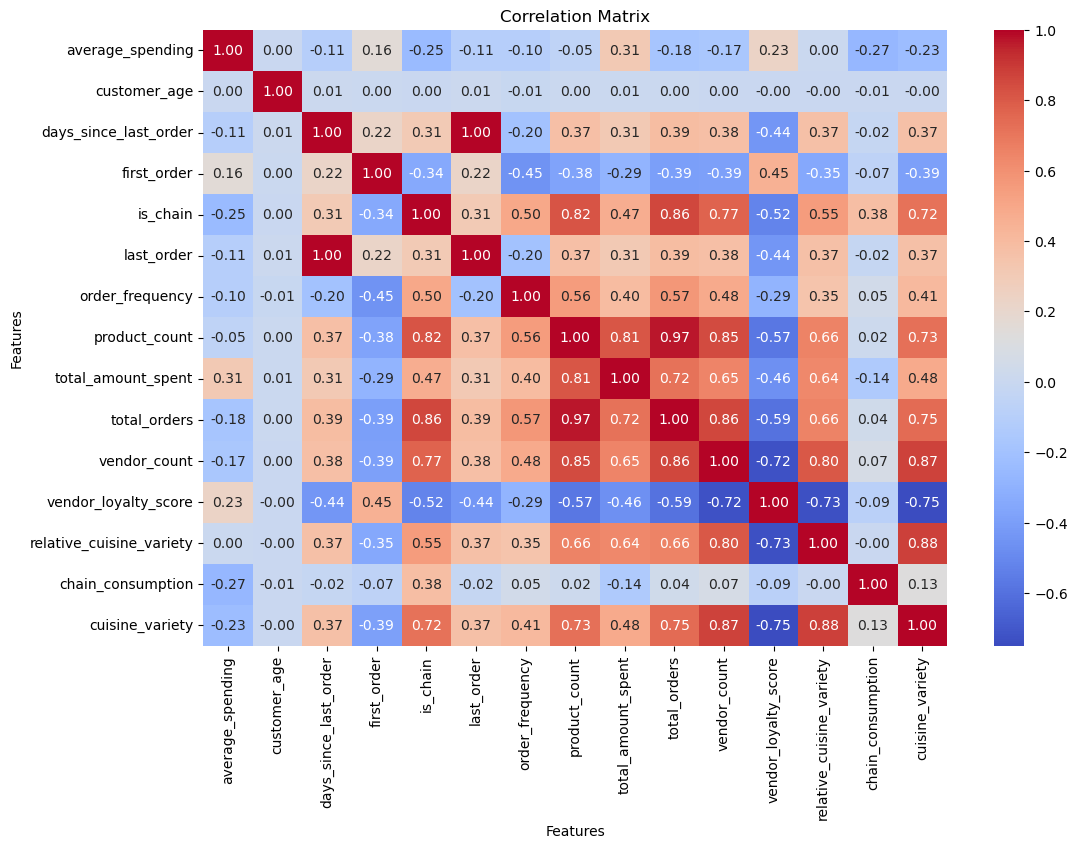

In [459]:
# compute the correlation between the selected features
correlation_matrix = df_corr.corr()

# plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

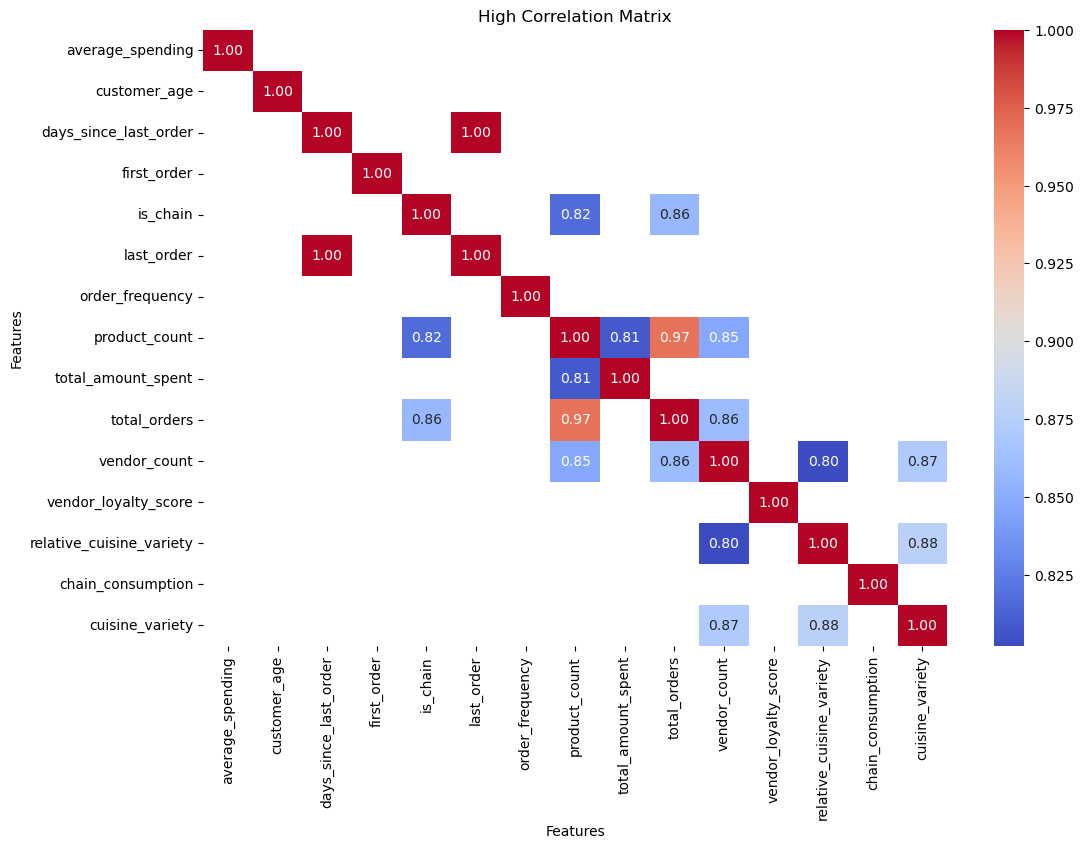

In [460]:
# filter the correlations above 0.8 andd below -0.8
high_corr_matrix = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]

plt.figure(figsize=(12, 8))
# plot the heatmap with the filtered correlations
sns.heatmap(high_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=high_corr_matrix.isna())

plt.title('High Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

In [453]:
# drop the features with high correlation
df_corr.drop(['vendor_count', 'product_count', 'is_chain', 'last_order', 'cuisine_variety'], axis=1, inplace=True)

In [454]:
# features after feature selection
df_corr.columns

Index(['average_spending', 'customer_age', 'days_since_last_order',
       'first_order', 'order_frequency', 'total_amount_spent', 'total_orders',
       'vendor_loyalty_score', 'relative_cuisine_variety',
       'chain_consumption'],
      dtype='object')

# Perspectives

**Preference-based** - explain what this perspective is

**Behavioral** - explain what this perspective is

In [411]:
# creating a dataframe for each perspective, containing the features that belong to it
preferences = df[['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']]

behaviours = df[['first_order','days_since_last_order', 'order_frequency', 'total_orders', 
                'total_amount_spent', 'average_spending']]

In [412]:
df_preferences = preferences.copy()
df_behaviours = behaviours.copy()

## K-Means

In [13]:
np.random.seed(42)

In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.base import clone

In [17]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# set up the clusterers
# n_init = 10 and random_state = 42
kmeans = KMeans(
    init='k-means++',
    n_init=10,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

#### Preference-based Perspective

#### Choosing Clustering Algorithm and Optimal Number of Clusters

In [18]:
# obtain the R² scores for each cluster solution on preferences variables
r2_scores_prf = {}
r2_scores_prf['kmeans'] = get_r2_scores(df_preferences, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores_prf[linkage] = get_r2_scores(
        df_preferences, hierarchical.set_params(linkage=linkage)
    )

# visualize the R² scores for each cluster solution on preferences variables
pd.DataFrame(r2_scores_prf).plot.line(figsize=(10,8))

plt.title("Preferences Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

MemoryError: unable to allocate array data.

- Since the graph indicates clearly that KMeans consistently achieves the highest R2 values, we decided to use it for our clusters.

In [ ]:
# cluster range for preferential perspective
range_clusters_prf = range(1, 10)

In [ ]:
# empty list to store the inertia values for each number of clusters
inertia_prf = []
for n_clus_prf in range_clusters_prf:  # iterate over desired ncluster range
    kmclust_prf = KMeans(n_clusters=n_clus_prf, init='k-means++', n_init=15, random_state=42)
    kmclust_prf.fit(preferences)
    inertia_prf.append(kmclust_prf.inertia_) 

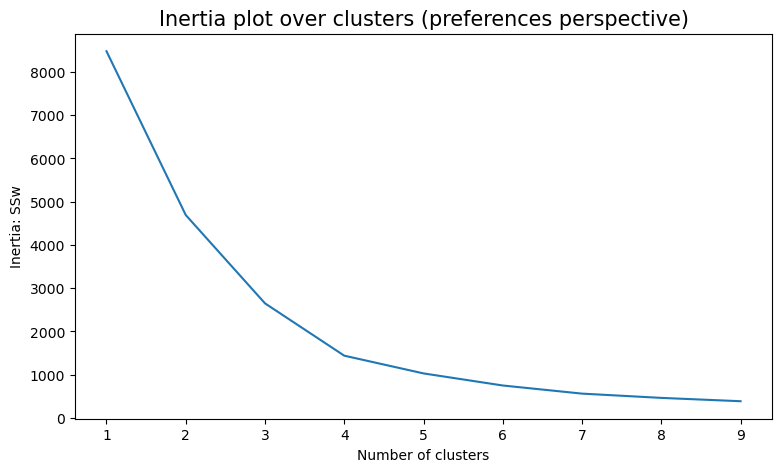

In [ ]:
# inertia plot
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters_prf, inertia_prf)
ax.set_xticks(range_clusters_prf)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters (preferences perspective)", size=15)

plt.show()

In [ ]:
warnings.filterwarnings("ignore")

# compute TSS (Total Sum of Squares)
tss = np.sum((preferences - preferences.mean())**2).sum()

# list to store R² scores for 3, and 4 clusters
r2_scores = []

# evaluate R² for 3, and 4 clusters
for n_clusters in [3, 4]:
    kmclust_prf = KMeans(n_clusters=n_clusters, init='k-means++', n_init=15, random_state=42)
    kmclust_prf.fit(preferences)
    wss_k = kmclust_prf.inertia_  # WSS for the current number of clusters
    r2 = 1 - (wss_k / tss)  # calculate R²
    r2_scores.append((n_clusters, r2))

# display the results
for n_clusters, r2 in r2_scores:
    print(f"R² score for {n_clusters} clusters: {r2:.4f}")

R² score for 3 clusters: 0.6876
R² score for 4 clusters: 0.8303


In [ ]:
# KMeans clustering algorithm
# grouped into 4 clusters
# 'k-means++' method for centroid initialization
# run the KMeans algorithm 15 times with different initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs
kmclust_prf = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=42)
cluster_labels_prf = kmclust_prf.fit_predict(preferences)

- From this Elbow plot, we can observe that the optimal number of clusters for the preferences perspective is 3, as this is the point where the rate of decrease in within-cluster sum of squares (WSS) significantly slows down.

In [ ]:
# Evaluate the clustering quality using silhouette score and Davies-Bouldin index

# The silhouette score ranges from -1 to 1, where a higher value indicates better clustering
silhouette_avg_prf = silhouette_score(preferences, cluster_labels_prf, metric="euclidean")
print(f'Silhouette Score: {round(silhouette_avg_prf,3)}') 

db_avg_prf = davies_bouldin_score(preferences, cluster_labels_prf)
# The Davies-Bouldin index ranges from 0 to infinity, where a lower value indicates better clustering
print(f'Davies-Bouldin Index: {round(db_avg_prf,3)}')

Silhouette Score: 0.577
Davies-Bouldin Index: 0.591


- From the Silhouette plot, for the preferences perspective, the optimal number of clusters is 5, as this is the point where the average silhouette score reaches its peak. 

### KMeans Implementation on Preference-based

In [ ]:
# final cluster solution of the preferential perspective
number_clusters_prf = 4
kmclust_prf = KMeans(n_clusters=number_clusters_prf, init='k-means++', n_init=15, random_state=42)
km_labels_prf = kmclust_prf.fit_predict(preferences)
df['preferences_labels'] = km_labels_prf

In [ ]:
# characterizing the final clusters of the preferential perspective
df_concat = pd.concat((preferences, pd.Series(km_labels_prf, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

vendor_loyalty_score  relative_cuisine_variety  chain_consumption
labels                                                                   
0                   0.320845                  0.243412           0.891048
1                   1.000000                  0.098094           0.000000
2                   1.000000                  0.088936           1.000000
3                   0.360582                  0.247021           0.308113

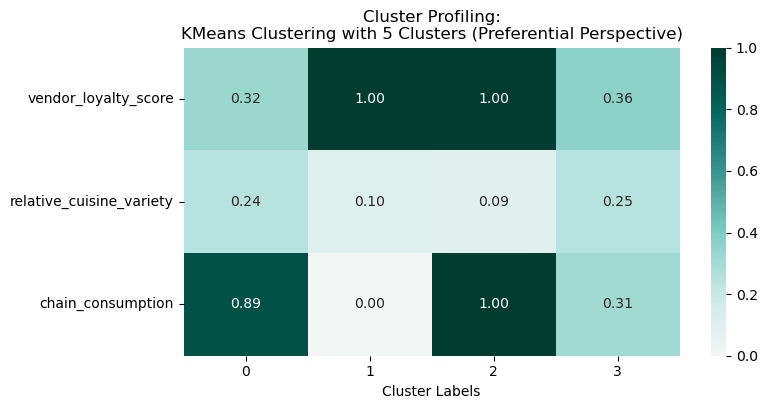

In [ ]:
# add the cluster labels to the original data for profiling
df_with_labels_prf = preferences.copy()
df_with_labels_prf['Cluster Labels'] = km_labels_prf

# compute the cluster profile
km_profile_prf = df_with_labels_prf.groupby('Cluster Labels').mean().T

fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(km_profile_prf,
            center=0, annot=True, cmap="BrBG", fmt=".2f",
            ax=ax)
ax.set_xlabel("Cluster Labels")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 5 Clusters (Preferential Perspective)")
plt.show()

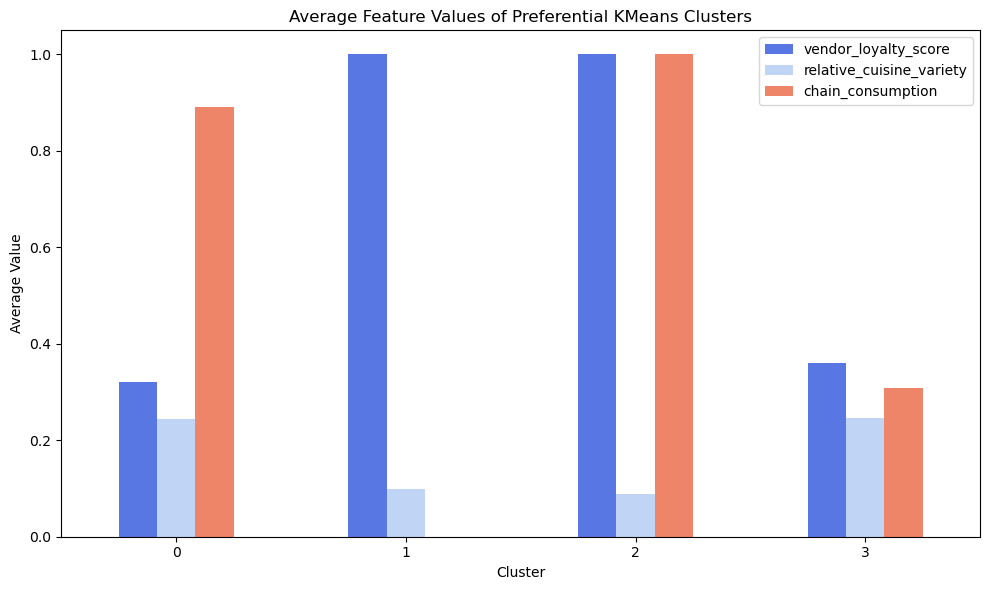

In [ ]:
# add KMeans cluster labels to the DataFrame
df_preferences['km_labels_prf'] = km_labels_prf

# specify the features to plot
preferences = ['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']

# group by 'km_cluster' and compute the mean
cluster_means = df_preferences[preferences + ['km_labels_prf']].groupby('km_labels_prf').mean()

# coolwarm colormap to color the bars
cmap = cm.coolwarm
vendor_loyalty_score_color = cmap(0.1)
relative_cuisine_variet_color = cmap(0.4)
chain_consumption_color = cmap(0.8)

colors = [vendor_loyalty_score_color, relative_cuisine_variet_color, chain_consumption_color]

ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Feature Values of Preferential KMeans Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Analysing the appropriateness of our solution using R²

In [ ]:
# using R²
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_preferences)  # get total sum of squares
ssw_labels = df_preferences[preferences + ['km_labels_prf']].groupby('km_labels_prf').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
round(r2, 3)

0.976

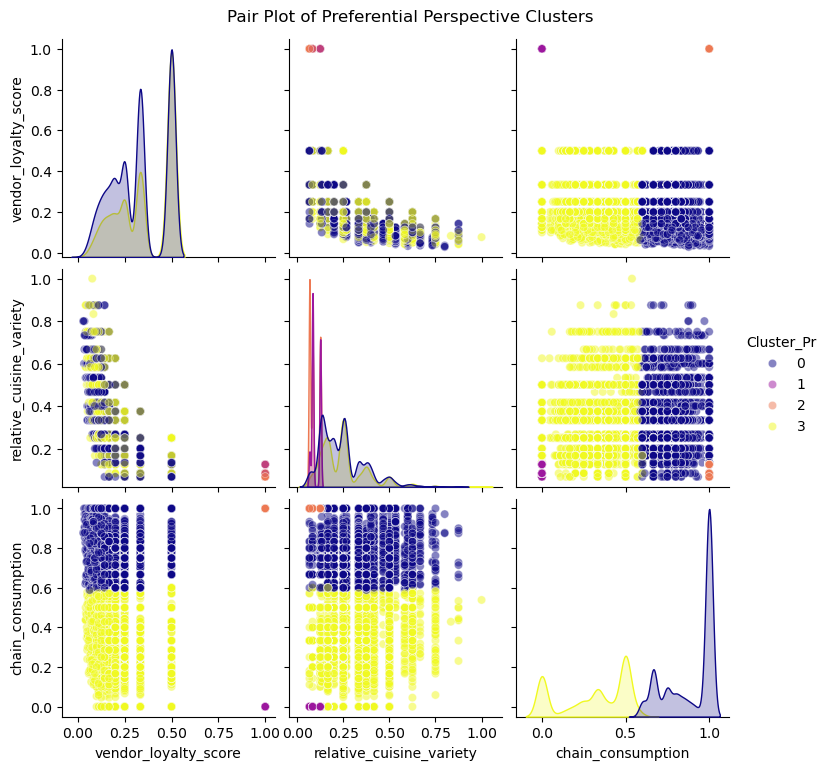

In [ ]:
# add the cluster labels to the DataFrame
df['Cluster_Pr'] = km_labels_prf

# select a subset of features for the pair plot, including the cluster label
features_to_plot_prf = preferences + ['Cluster_Pr'] 

# create a DataFrame for plotting
plot_df_prf = df[features_to_plot_prf]

# create the pair plot
sns.pairplot(plot_df_prf, hue='Cluster_Pr', palette='plasma', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Preferential Perspective Clusters', y=1.02)
plt.show()

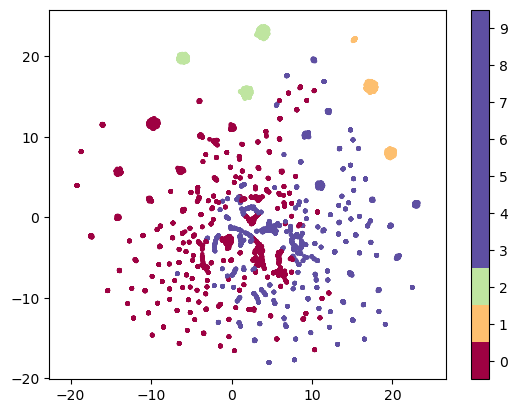

In [ ]:
## U-map to visualize the clusters

reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')
embedding = reducer.fit_transform(df_preferences[preferences])
embedding

plt.scatter(embedding[:, 0], embedding[:, 1], c= df_preferences['km_labels_prf'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

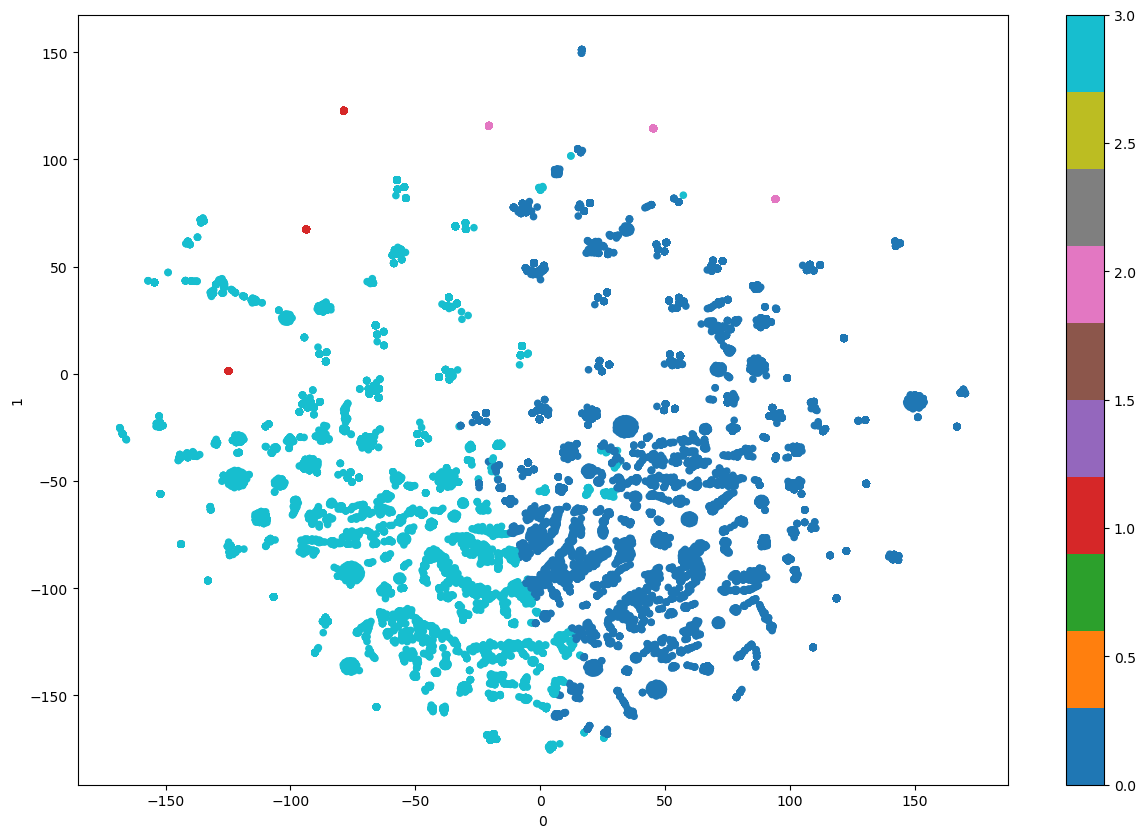

In [ ]:
## T-sne to visualize the clusters:
two_dim = TSNE(random_state=42).fit_transform(df_preferences[preferences])

# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_preferences['km_labels_prf'], colormap='tab10', figsize=(15,10))
plt.show()

#### Behaviour-based Perspective

#### Choosing Clustering Algorithm and Optimal Number of Clusters

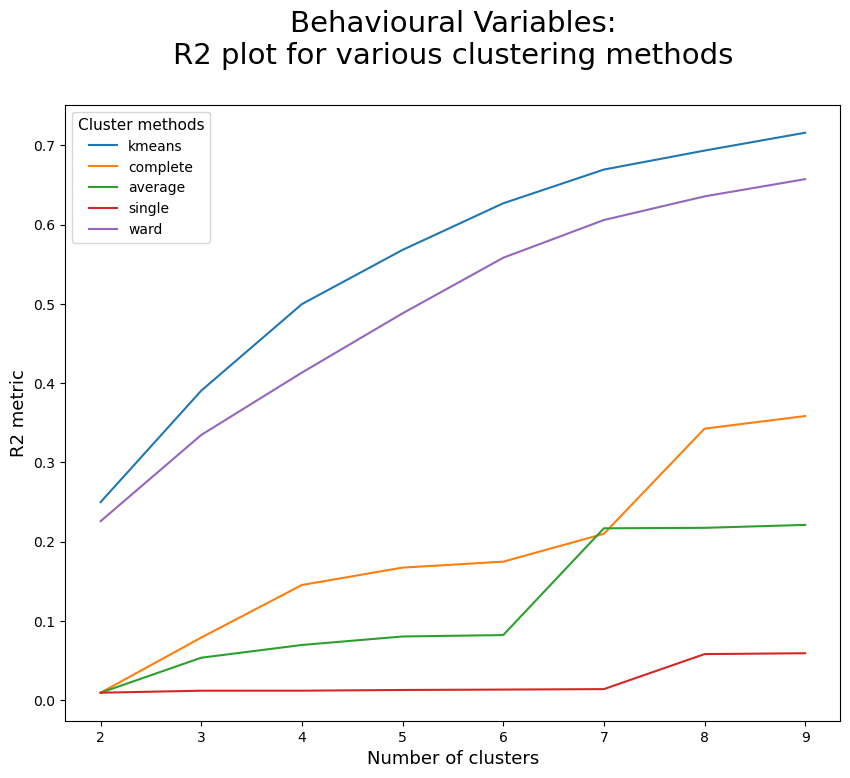

In [ ]:
# define the R² calculation function
def r2(df, labels):
    overall_mean = df.mean(axis=0)
    clusters = pd.DataFrame({'cluster': labels, 'count': 1}).groupby('cluster').sum()
    cluster_means = pd.DataFrame({'cluster': labels}).join(df).groupby('cluster').mean()

    ss_between = sum(
        clusters['count'][k] * ((cluster_means.loc[k] - overall_mean) ** 2).sum()
        for k in clusters.index
    )
    ss_total = ((df - overall_mean) ** 2).sum().sum()
    return ss_between / ss_total

# define function to get R² scores for varying cluster counts
def get_r2_scores(df, clusterer, min_k=2, max_k=9):
    r2_clust = {}
    for n in range(min_k, max_k + 1):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust

# normalize the behavioural features
scaler = StandardScaler()
df_behaviours_scaled = pd.DataFrame(scaler.fit_transform(df_behaviours), columns=df_behaviours.columns)

# set up clusterers
kmeans = KMeans(init='k-means++', n_init=10, random_state=42)
hierarchical = AgglomerativeClustering(metric='euclidean')

# compute R² scores for behavioural variables
r2_scores_beh = {}
r2_scores_beh['kmeans'] = get_r2_scores(df_behaviours_scaled, kmeans, min_k=2, max_k=9)

for linkage in ['complete', 'average', 'single', 'ward']:
    hierarchical.set_params(linkage=linkage)
    r2_scores_beh[linkage] = get_r2_scores(df_behaviours_scaled, hierarchical, min_k=2, max_k=9)

# convert results to a DataFrame
r2_scores_df = pd.DataFrame(r2_scores_beh)

# visualizing the R² scores for each cluster solution on behavioural variables
pd.DataFrame(r2_scores_beh).plot.line(figsize=(10,8))

plt.title("Behavioural Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

- We chose to use KMeans for our clusters because the graph clearly shows that it consistently achieves the highest R² values.

In [ ]:
# cluster range for behavioural perspective
range_clusters_beh = range(1, 10)

In [ ]:
# empty list to store the inertia values for each number of clusters
inertia_beh = []
for n_clus_beh in range_clusters_beh:  # iterate over desired ncluster range
    kmclust_beh = KMeans(n_clusters=n_clus_beh, init='k-means++', n_init=15, random_state=42)
    kmclust_beh.fit(behaviours)
    inertia_beh.append(kmclust_beh.inertia_)

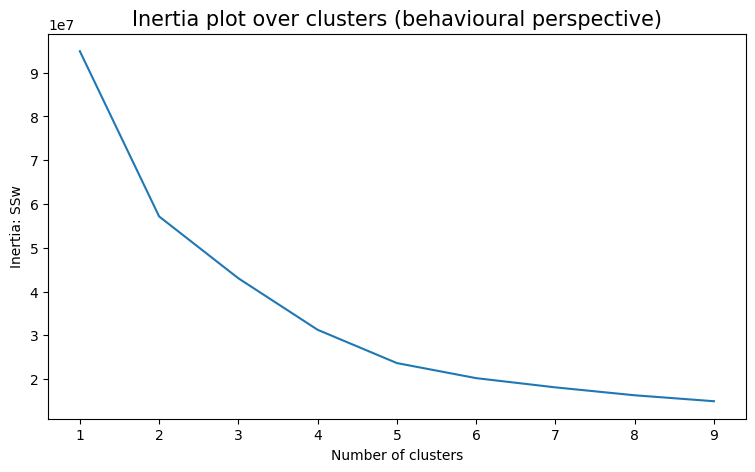

In [ ]:
# inertia plot
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters_beh, inertia_beh)
ax.set_xticks(range_clusters_beh)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters (behavioural perspective)", size=15)

plt.show()

- Since we were uncertain whether the optimal number of clusters was 4, or 5, we calculated the R² score for all cluster values, though we focused on the results for these three.

In [ ]:
warnings.filterwarnings("ignore")

# compute TSS (Total Sum of Squares)
tss = np.sum((behaviours - behaviours.mean())**2).sum()

# list to store R² scores for all the clusters
r2_scores = []

# evaluate R² 
for n_clusters in [4, 5]:
    kmclust_beh = KMeans(n_clusters=n_clusters, init='k-means++', n_init=15, random_state=42)
    kmclust_beh.fit(behaviours)
    wss_k = kmclust_beh.inertia_ 
    r2 = 1 - (wss_k / tss) 
    r2_scores.append((n_clusters, r2))

# Display the results
for n_clusters, r2 in r2_scores:
    print(f"R² score for {n_clusters} clusters: {r2:.4f}")

R² score for 4 clusters: 0.6705
R² score for 5 clusters: 0.7506


- From the values, we can conclude that the optimal number of clusters for the behavioural perspective is 5, since the R² score reaches its highest value on that point, amount the previous three described.

In [ ]:
# KMeans clustering algorithm
# grouped into 5 clusters
# 'k-means++' method for centroid initialization
# run the KMeans algorithm 15 times with different random initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs 
kmclust_beh = KMeans(n_clusters=5, init='k-means++', n_init=15, random_state=42)
cluster_labels_beh = kmclust_beh.fit_predict(behaviours)

In [ ]:
# Evaluate the clustering quality using silhouette score and Davies-Bouldin index

# The silhouette score ranges from -1 to 1, where a higher value indicates better clustering
silhouette_avg_beh = silhouette_score(behaviours, cluster_labels_beh, metric="euclidean")
print(f'Silhouette Score: {round(silhouette_avg_beh,3)}') 

db_avg_beh = davies_bouldin_score(behaviours, cluster_labels_beh)
# The Davies-Bouldin index ranges from 0 to infinity, where a lower value indicates better clustering
print(f'Davies-Bouldin Index: {round(db_avg_beh,3)}')

Silhouette Score: 0.372
Davies-Bouldin Index: 0.859


### KMeans Implementation on Behaviour-based

In [ ]:
# final cluster solution of the behavioural perspective
number_clusters_beh = 5
kmclust_beh = KMeans(n_clusters=number_clusters_beh, init='k-means++', n_init=15, random_state=42)
km_labels_beh = kmclust_beh.fit_predict(behaviours)
df['behaviours_labels'] = km_labels_beh

In [ ]:
# characterizing the final clusters of the behavioural perspective
df_concat = pd.concat((behaviours, pd.Series(km_labels_beh, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

first_order  days_since_last_order  order_frequency  total_orders  \
labels                                                                      
0         14.725495              77.973356         0.120997      9.488634   
1         15.861645              74.787850         0.064350      4.804990   
2          8.230668              83.319790         0.209018     17.519004   
3         18.443173              30.025098         0.096129      2.014954   
4         61.626964              72.650006         0.027802      2.028713   

        total_amount_spent  average_spending  
labels                                        
0                94.986057         13.885101  
1                31.309551          7.641294  
2               223.742412         16.084688  
3                17.798133         10.485807  
4                19.572809         11.172739

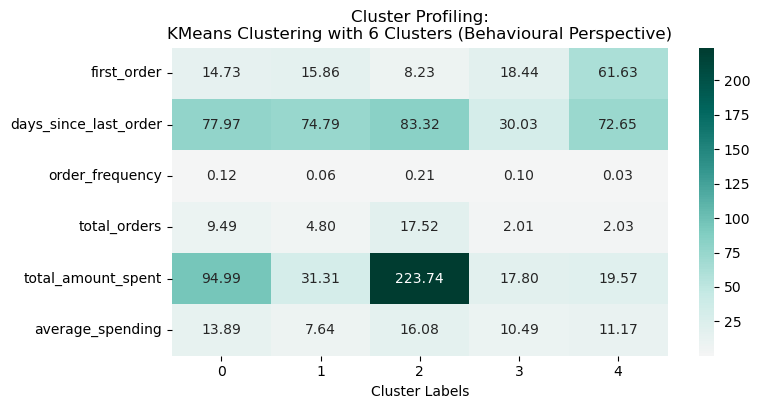

In [ ]:
# add the cluster labels to the original data for profiling
df_with_labels_beh = behaviours.copy()
df_with_labels_beh['Cluster Labels'] = km_labels_beh

# compute the cluster profile
km_profile_beh = df_with_labels_beh.groupby('Cluster Labels').mean().T

fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(km_profile_beh,
            center=0, annot=True, cmap="BrBG", fmt=".2f",
            ax=ax)
ax.set_xlabel("Cluster Labels")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 6 Clusters (Behavioural Perspective)")
plt.show()

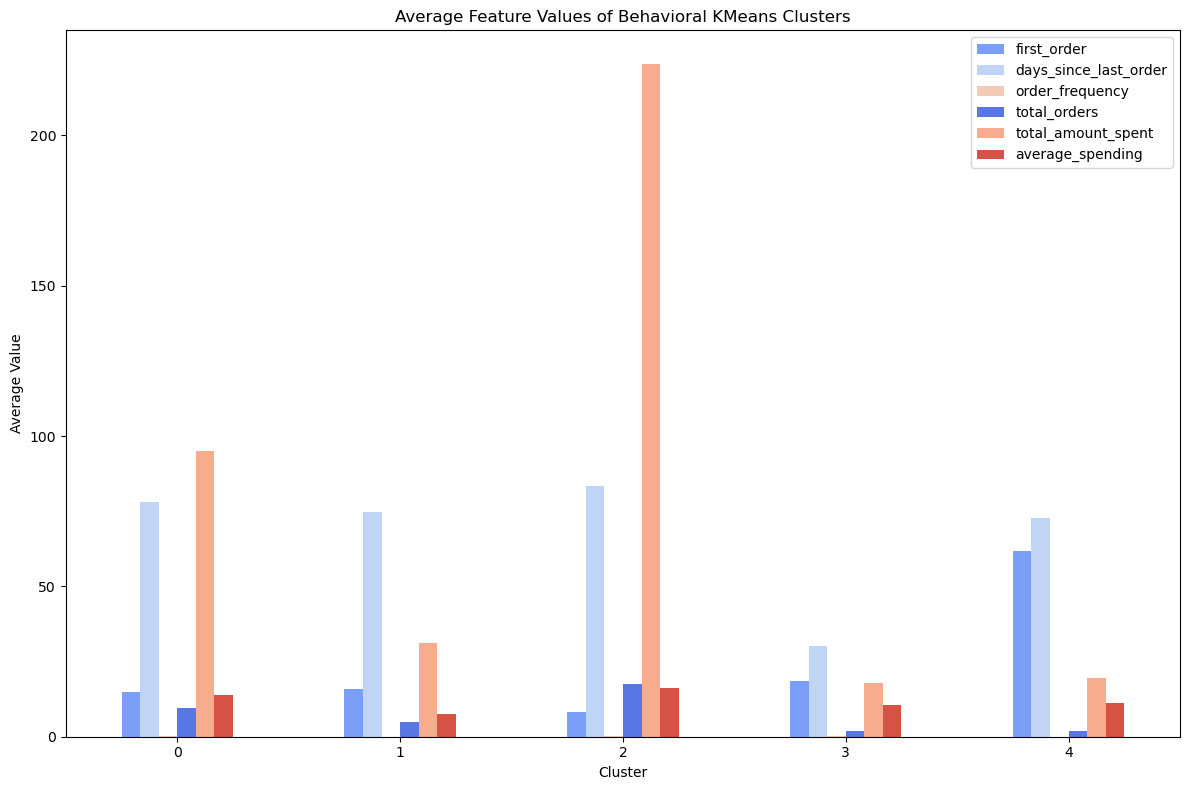

In [ ]:
# add KMeans cluster labels to the DataFrame
df['km_labels_beh'] = km_labels_beh

# specify the features to plot
behaviours = ['first_order', 'days_since_last_order', 'order_frequency', 
              'total_orders', 'total_amount_spent', 'average_spending']

# select the relevant columns from the DataFrame
plot_df_beh = df[behaviours + ['km_labels_beh']]

# group by 'km_labels_beh' and compute the mean of each cluster
cluster_means = plot_df_beh.groupby('km_labels_beh').mean()

# use the coolwarm colormap to color the bars
cmap = cm.coolwarm
first_order_color = cmap(0.2)
days_since_last_order_color = cmap(0.4)
order_frequency_color = cmap(0.6)
total_orders_color = cmap(0.1)
total_amount_spent_color = cmap(0.7)
average_spending_color = cmap(0.9)

colors = [first_order_color, days_since_last_order_color, order_frequency_color, 
          total_orders_color, total_amount_spent_color, average_spending_color]

# plotting the bar plot
ax = cluster_means.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Average Feature Values of Behavioral KMeans Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Analysing the appropriateness of our solution using R²

In [ ]:
df_behaviours['km_labels_beh'] = km_labels_beh

# using R²
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_behaviours[behaviours])  # get total sum of squares

ssw_labels = (
    df_behaviours[behaviours + ['km_labels_beh']]
    .groupby('km_labels_beh')
    .apply(get_ss)  # compute SSW for each cluster
)

ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
round(r2, 3)

0.751

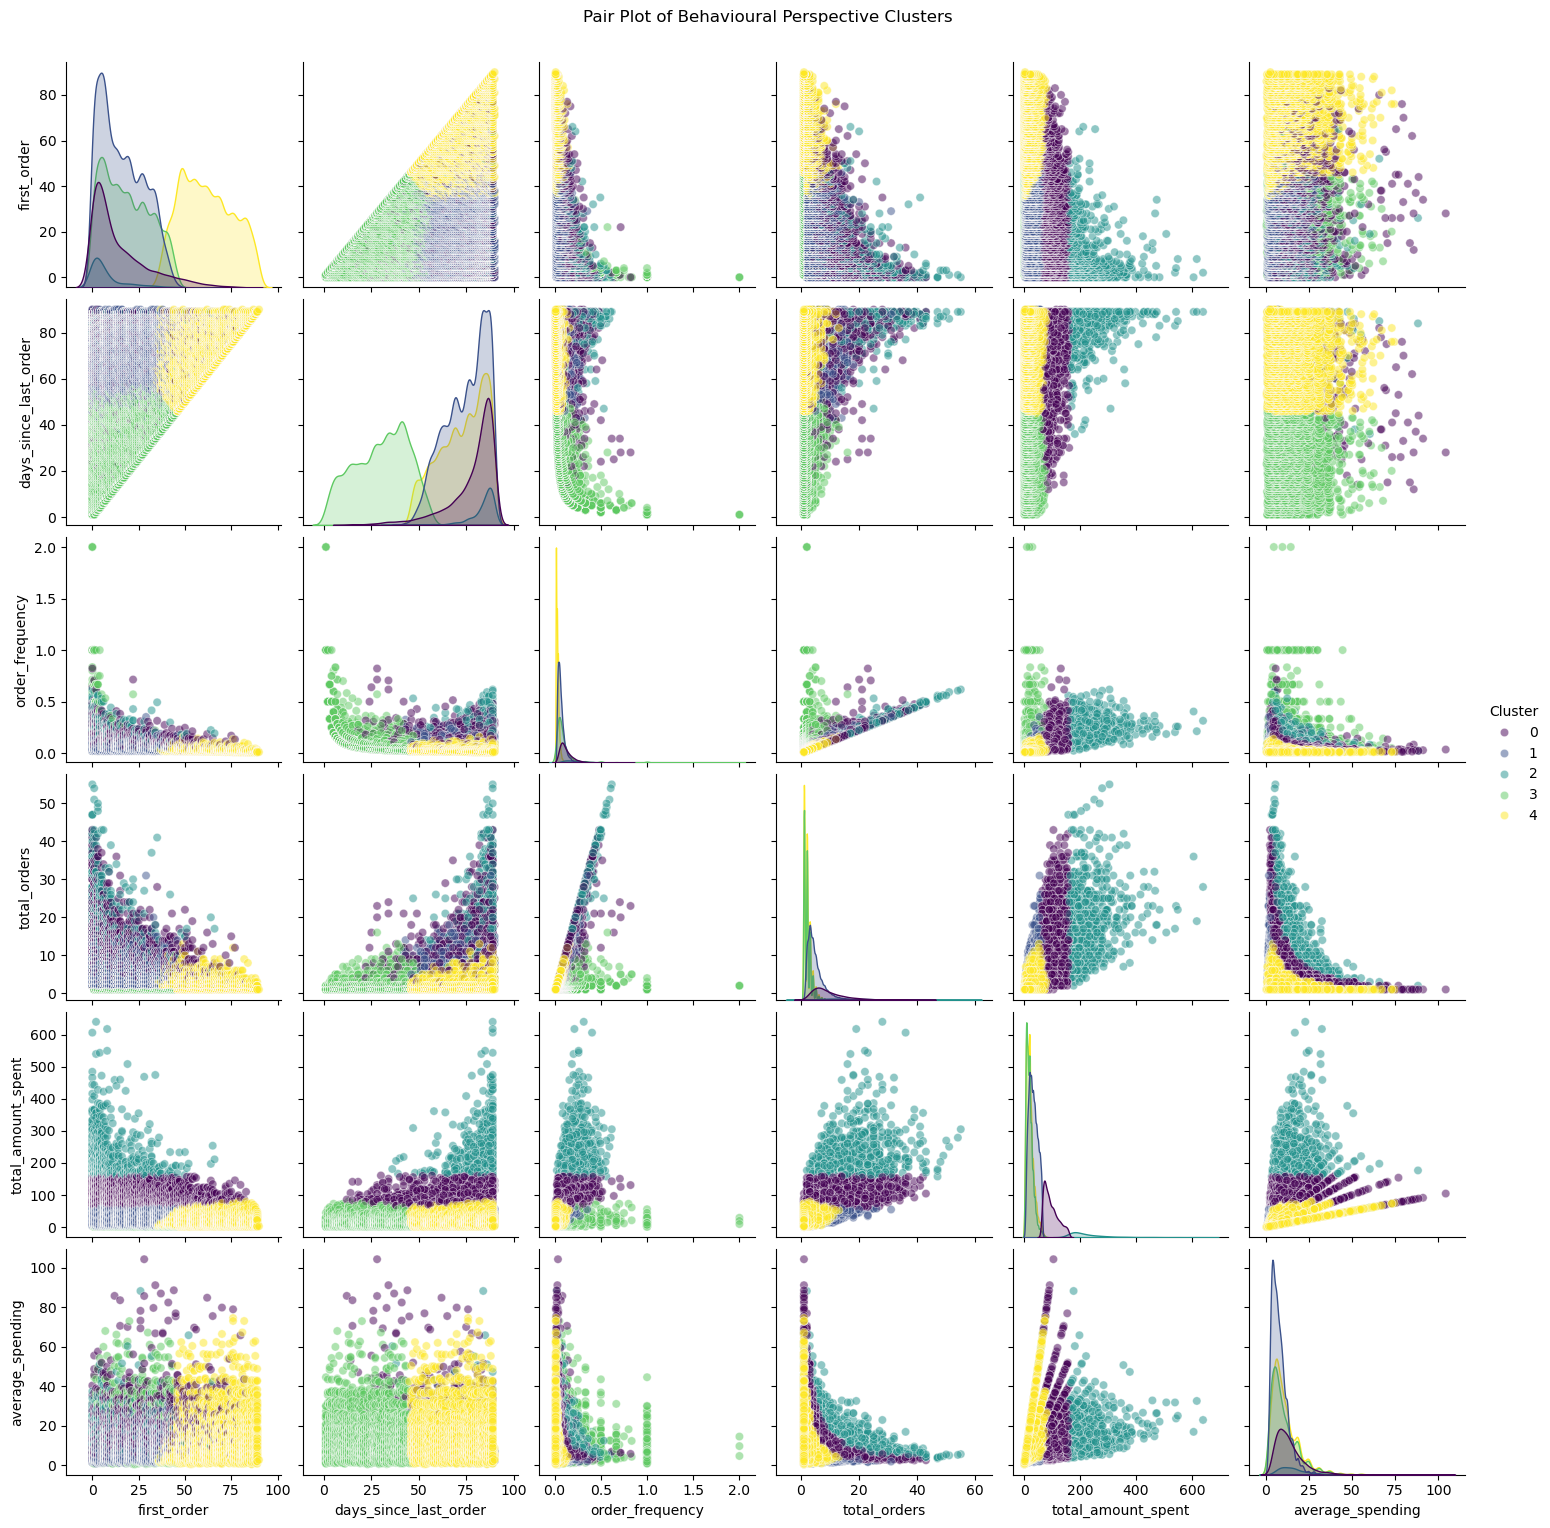

In [ ]:
# add cluster labels to the DataFrame
df['Cluster'] = km_labels_beh

# select features for plotting (ensure all columns exist in df)
features_to_plot = behaviours + ['Cluster'] 
# create a DataFrame for plotting
plot_df = df[features_to_plot]

sns.pairplot(plot_df, hue='Cluster', palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Behavioural Perspective Clusters', y=1.02)
plt.show()

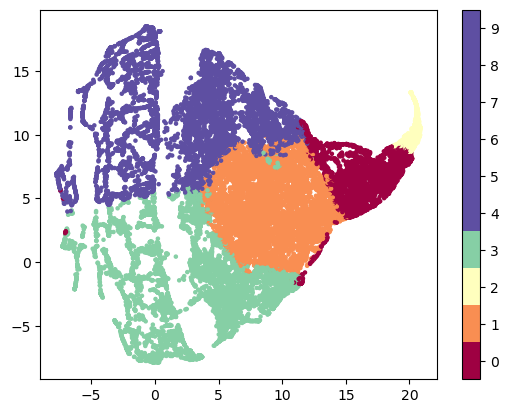

In [ ]:
## U-map to visualize the clusters

reducer_beh = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')
embedding_beh = reducer_beh.fit_transform(df_behaviours[behaviours])
embedding_beh

plt.scatter(embedding_beh[:, 0], embedding_beh[:, 1], c= df_behaviours['km_labels_beh'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

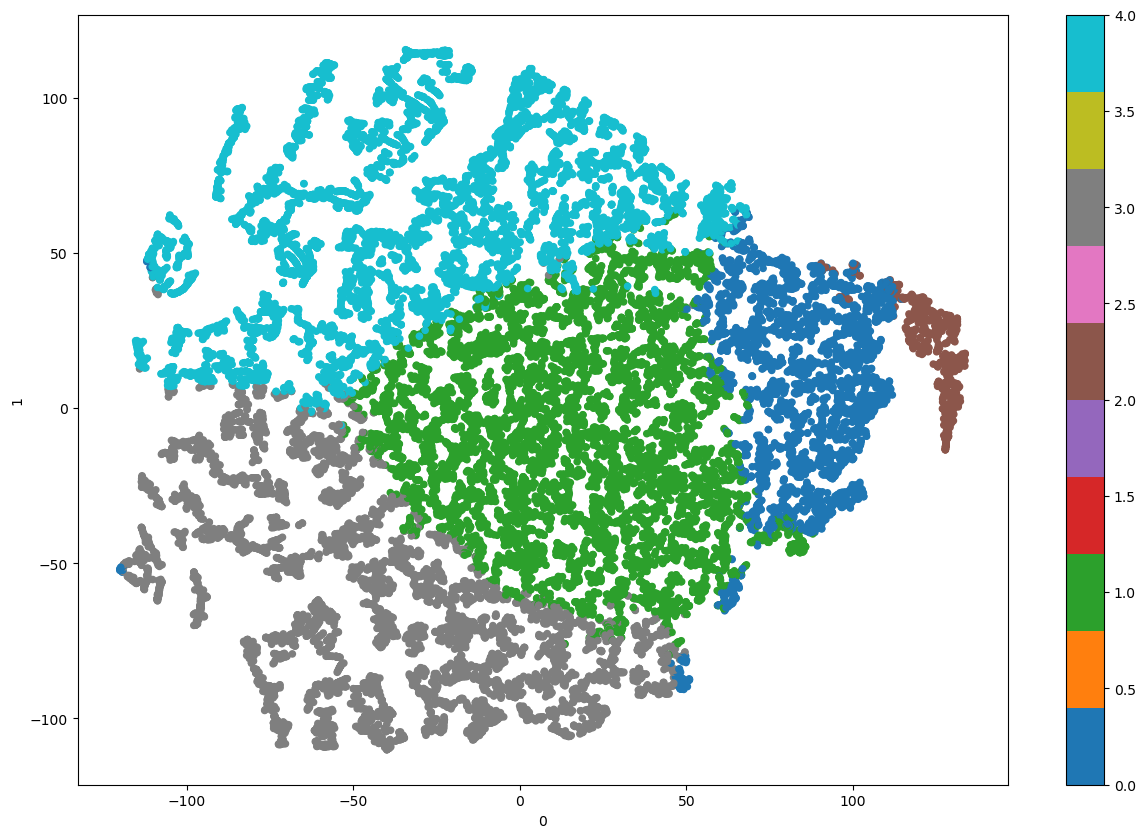

In [ ]:
## T-sne to visualize the clusters:
two_dim_beh = TSNE(random_state=42).fit_transform(df_behaviours[behaviours])

# t-SNE visualization
pd.DataFrame(two_dim_beh).plot.scatter(x=0, y=1, c=df_behaviours['km_labels_beh'], colormap='tab10', figsize=(15,10))
plt.show()

## Self-Organizing Maps

### Preference-based Perspective

In [260]:
# deciding the grid size for the SOM using a formula based on the number of rows in the dataset
grid_size = 5 * (preferences.shape[0] ** 0.5)

print(f'The product of M and N should be close to {round(grid_size,2)}')
print(f'Thus M and N should be close to {round(grid_size ** 0.5,2)}')

The product of M and N should be close to 887.76
Thus M and N should be close to 29.8


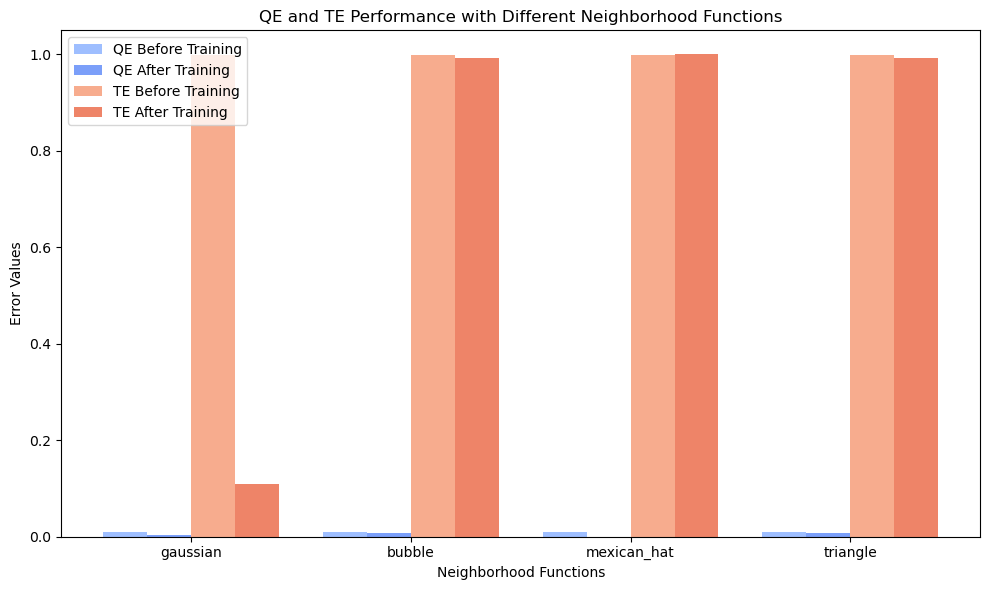

In [261]:
# comparing the performance of different neighborhood functions
som_data = preferences.values

sigma = 1
learning_rate = 0.9
M = 30
N = 30  
n_feats = len(preferences.columns) # number of features used in the SOM

# list of neighborhood functions to test
neighborhood_functions = ['gaussian', 'bubble', 'mexican_hat', 'triangle']

# lists to store QE and TE values for each neighborhood function
qe_values = []
te_values = []

# train the SOM with each neighborhood function
for func in neighborhood_functions:
    sm = MiniSom(M, N, n_feats,
                 sigma=sigma, 
                 neighborhood_function=func, 
                 learning_rate=learning_rate, 
                 topology='hexagonal', 
                 random_seed=42)
    
    # initialize the weights of the SOM picking random samples from data
    sm.random_weights_init(som_data)
    
    # errors before training
    qe_before = sm.quantization_error(som_data)
    te_before = sm.topographic_error(som_data)
    
    # train the SOM
    sm.train_batch(preferences.values,
                   num_iteration=50000)
    
    # errors after training
    qe_after = sm.quantization_error(som_data)
    te_after = sm.topographic_error(som_data)
    
    # store QE and TE values after training
    qe_values.append((qe_before, qe_after))
    te_values.append((te_before, te_after))

fig, ax = plt.subplots(figsize=(10, 6))

# plot QE and TE for each neighborhood function
width = 0.2  # width of the bars
x_pos = np.arange(len(neighborhood_functions))  # position for each neighborhood function

# use specific colors from coolwarm colormap to color the bars in the plot
cmap = cm.coolwarm
qe_before_color = cmap(0.3)
qe_after_color = cmap(0.2)
te_before_color = cmap(0.7)
te_after_color = cmap(0.8)   

# plot QE values
ax.bar(x_pos - width, [qe[0] for qe in qe_values], width, label="QE Before Training", color=qe_before_color)
ax.bar(x_pos, [qe[1] for qe in qe_values], width, label="QE After Training", color=qe_after_color)

# plot TE values
ax.bar(x_pos + width, [te[0] for te in te_values], width, label="TE Before Training", color=te_before_color)
ax.bar(x_pos + 2*width, [te[1] for te in te_values], width, label="TE After Training", color=te_after_color)

# customize plot
ax.set_xlabel('Neighborhood Functions')
ax.set_ylabel('Error Values')
ax.set_title('QE and TE Performance with Different Neighborhood Functions')
ax.set_xticks(x_pos + width / 2)  # align tick labels with the grouped bars
ax.set_xticklabels(neighborhood_functions)
ax.legend()

# display plot
plt.tight_layout()
plt.show()

In [343]:
# actual training of the SOM and exact error values

sigma = 1
learning_rate = 0.9 # the learning rate value was chosen by experimenting and comparing QE and TE values
num_iteration = 5
M = 30
N = 30

sm = MiniSom(
   M, N, len(preferences.columns),
   sigma=sigma,
   learning_rate=learning_rate,
   neighborhood_function='gaussian', # according to the previous plot, the gaussian function performed better
   topology = 'hexagonal', # both hexagonal and rectangular topologies were tested, hexagonal performed better
   random_seed=42)

# initialize the weights of the SOM picking random samples from data
sm.random_weights_init(preferences.values)

# initial quantization and topographic errors
initial_qe = sm.quantization_error(preferences.values)
initial_te = sm.topographic_error(preferences.values)

# train the SOM
sm.train(preferences.values,
           use_epochs=True,
           random_order=True,
           num_iteration=num_iteration)

# final quantization and topographic errors
final_qe = sm.quantization_error(preferences.values)
final_te = sm.topographic_error(preferences.values)

print(f'Intital quantization error vs After training {np.round([initial_qe, final_qe], 4)}')
print(f'Intital topographic error vs After training {np.round([initial_te, final_te], 4)}')

Intital quantization error vs After training [0.0096 0.0043]
Intital topographic error vs After training [0.9994 0.0528]


In [344]:
# storing the weights of the neurons after training
weights = sm.get_weights()
weights.shape

(30, 30, 3)

In [345]:
# function to plot the hexagons, reused from the practical sessions
def plot_hexagons(som,              # Trained SOM model 
                  sf,               # matplotlib figure object
                  colornorm,        # colornorm
                  matrix_vals,      # SOM weights or
                  label="",         # title for figure
                  cmap=cm.Greys,    # colormap to use
                  annot=False):     

    
    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):

            wx, wy = som.convert_map_to_euclidean((i,j)) 

            hex = RegularPolygon((wx, wy), 
                                numVertices=6, 
                                radius= np.sqrt(1/3),
                                facecolor=cmap(colornorm(matrix_vals[i, j])), 
                                alpha=1, 
                                edgecolor='white',
                                linewidth=.5)
            axs.add_patch(hex)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx,wy, annot_val, 
                        ha='center', va='center', 
                        fontsize='small')

    # remove axes for hex plot
    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    # add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    # create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    # create custom colorbar 
    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    # add colorbar to plot
    sf.add_axes(ax_cb)

    return sf 

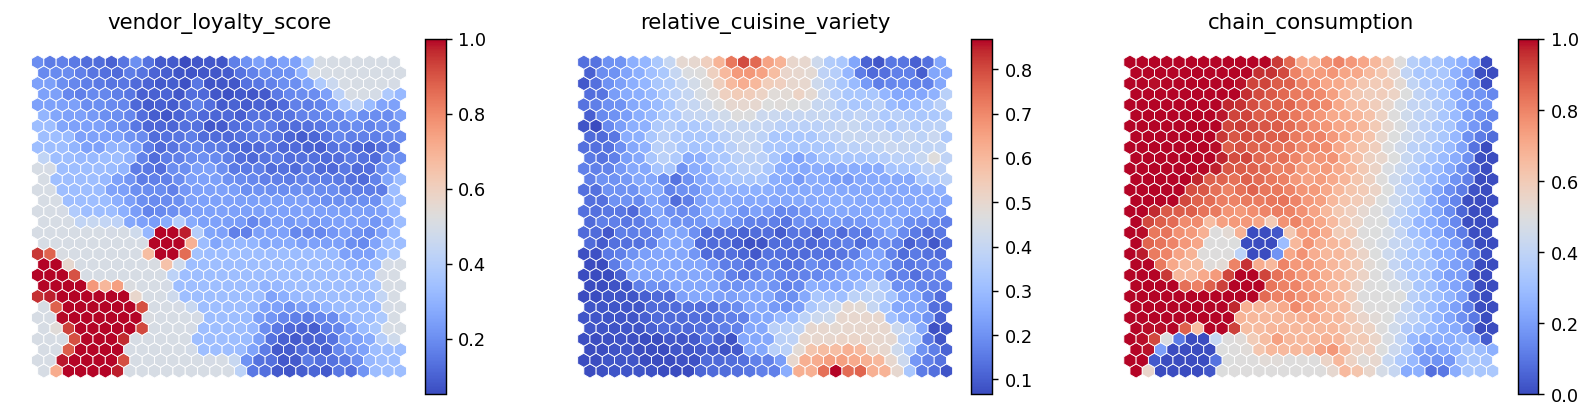

In [346]:
# plot the hexagons for each feature in the perspective
figsize=(12, 8)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128)

subfigs = fig.subfigures(1, 3, wspace=0.2, hspace=0.4) # create subfigures for each perspective

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights)) # color normalization

for cpi, sf in zip(range(len(preferences.columns)), subfigs.flatten()):
    
    matrix_vals = weights[:, :, cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)])) # max absolute value for color normalization
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals)) # color normalization

    sf = plot_hexagons(
        sm, sf, 
        colornorm,
        matrix_vals,
        label=preferences.columns[cpi],
        cmap=cm.coolwarm)

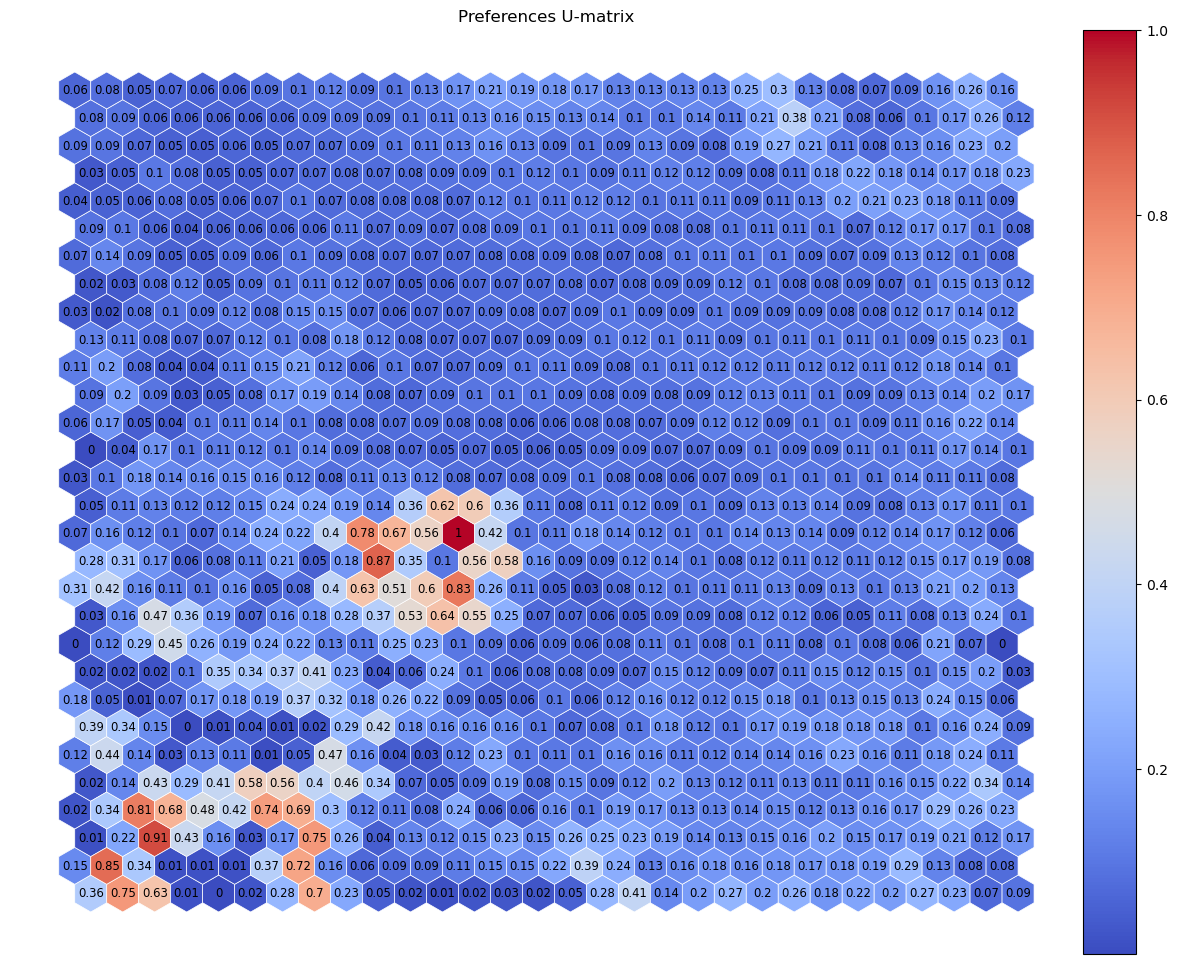

In [347]:
# plot the U-matrix for the SOM 
umatrix = sm.distance_map(scaling='mean')
fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix)) # color normalization

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    umatrix,
                    label="Preferences U-matrix",
                    cmap=cm.coolwarm,
                    annot=True)

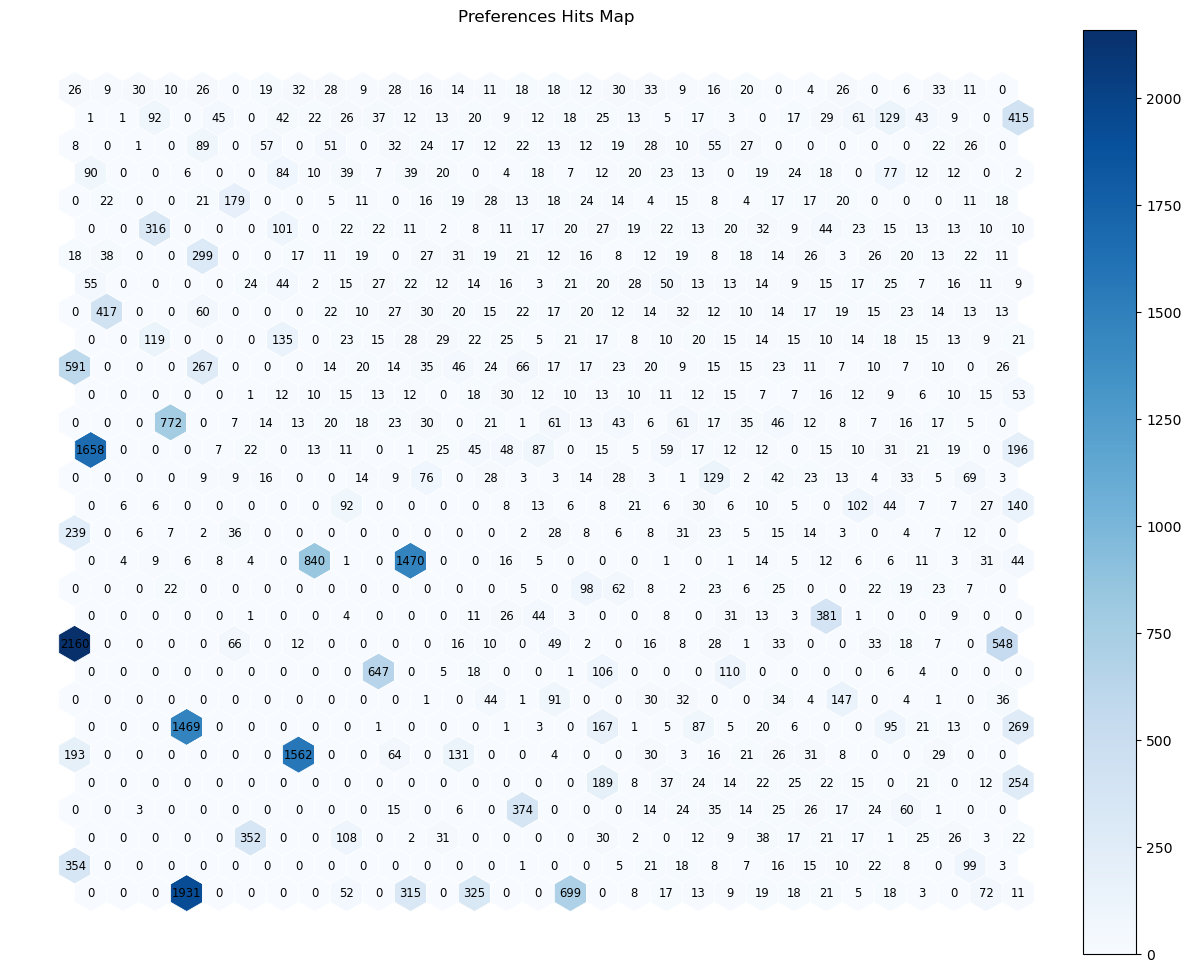

In [348]:
# plot the hits map for the SOM
hitsmatrix = sm.activation_response(preferences.values)

fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix)) # color normalization

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    hitsmatrix,
                    label="Preferences Hits Map",
                    cmap=cm.Blues,
                    annot=True)

### K-Means implementation

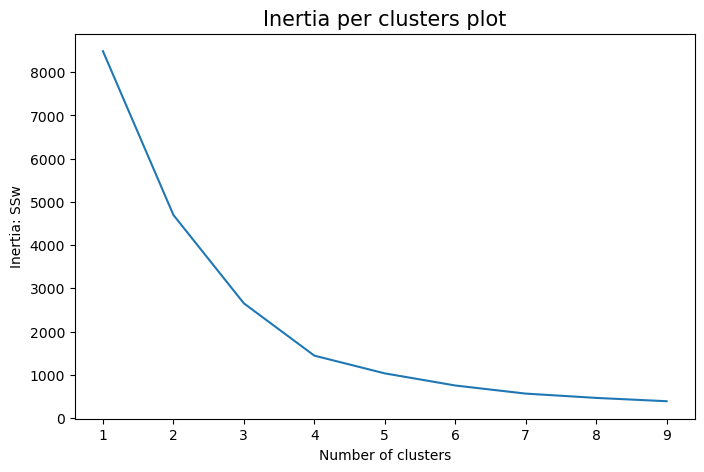

In [349]:
# deciding on the optimal number of clusters to use in the KMeans model
# defining the range of clusters to test
range_clusters = range(1, 10)

# list to store the inertia values for each number of clusters
inertia = []

# train the KMeans model for each number of clusters
for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=1)
    kmclust.fit(preferences)
    inertia.append(kmclust.inertia_)

# plot inertia
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia per clusters plot", size=15)

plt.show()

In [350]:
# flattened the weights of the neurons into a 2D list
preferences_weights_flat = sm.get_weights().reshape((M*N),len(preferences.columns))
preferences_weights_flat.shape

(900, 3)

In [351]:
# perform K-Means clustering on top of the SOM weights
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
kmeans_preferences_labels = kmeans.fit_predict(preferences_weights_flat)

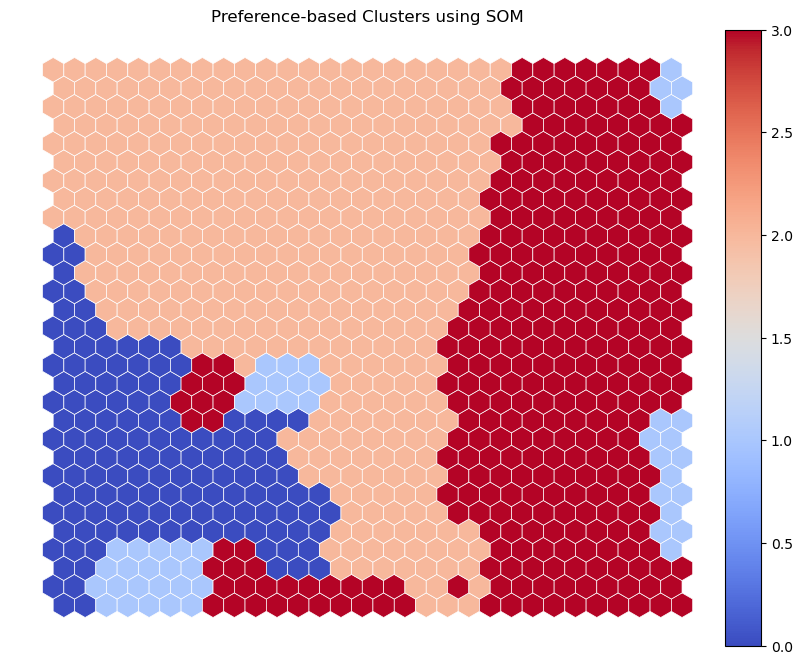

In [352]:
# plot the clusters on the SOM
kmeans_matrix = kmeans_preferences_labels.reshape((M,N)) # reshape the labels to the SOM shape

fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(kmeans_matrix)) # color normalization

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    kmeans_matrix,
                    label="Preference-based Clusters using SOM",
                    cmap=cm.coolwarm)

In [353]:
# evaluate the clustering quality using silhouette score and Davies-Bouldin index

som_preferences_score = silhouette_score(preferences_weights_flat, kmeans_preferences_labels, metric='euclidean')
# the silhouette score ranges from -1 to 1, where a higher value indicates better clustering
print(f'Silhouette Score: {round(som_preferences_score,3)}') 

som_preferences_index = davies_bouldin_score(preferences_weights_flat, kmeans_preferences_labels)
# the Davies-Bouldin index ranges from 0 to infinity, where a lower value indicates better clustering
print(f'Davies-Bouldin Index: {round(som_preferences_index,3)}')

Silhouette Score: 0.382
Davies-Bouldin Index: 0.891


In [354]:
# check the nodes and respective clusters
preferences_nodes = preferences_weights_flat

df_preferences_nodes = pd.DataFrame(preferences_nodes, columns=preferences.columns)
df_preferences_nodes['som_cluster'] = kmeans_preferences_labels
df_preferences_nodes

vendor_loyalty_score  relative_cuisine_variety  chain_consumption  \
0                0.500000                  0.066667       1.000000e+00   
1                0.500000                  0.066667       1.000000e+00   
2                0.500000                  0.066667       9.999994e-01   
3                0.500000                  0.070847       9.999942e-01   
4                0.500000                  0.083333       9.999981e-01   
..                    ...                       ...                ...   
895              0.248964                  0.372533       1.911584e-01   
896              0.321483                  0.368416       1.444003e-01   
897              0.499452                  0.246969       6.582402e-03   
898              0.500000                  0.250000       1.710867e-10   
899              0.500000                  0.247877       3.523011e-03   

     som_cluster  
0              0  
1              0  
2              0  
3              0  
4              0  
..           ...  
895            3  
896            3  
897            1  
898            1  
899            1  

[900 rows x 4 columns]

In [355]:
# get BMU coordinates for each data point
bmu_index = np.array([sm.winner(x) for x in preferences.values])

print(bmu_index.shape)

bmu_index

(31525, 2)


array([[8, 0],
       [9, 8],
       [3, 6],
       ...,
       [3, 0],
       [3, 6],
       [0, 9]], dtype=int64)

In [356]:
# get the final labels for each data point
som_final_preferences_labels = [kmeans_matrix[i[0]][i[1]] for i in bmu_index]

In [357]:
# add the final labels to the main dataframe
df['prf_som_cluster'] = som_final_preferences_labels

df.head()

CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e       0.000000   0.000000            0.0       0.0   
5d272b9dcb       0.045751   0.007126            0.0       0.0   
f6d1b2ba63       0.032833   0.000000            0.0       0.0   
180c632ed8       0.000000   0.015278            0.0       0.0   
4eb37a6705       0.051997   0.045578            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0           0.0          0.0   
5d272b9dcb                  0.0          0.0           0.0          0.0   
f6d1b2ba63                  0.0          0.0           0.0          0.0   
180c632ed8                  0.0          0.0           0.0          0.0   
4eb37a6705                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e     0.093442          0.0           0.0                0.0   
5d272b9dcb     0.000000          0.0           0.0                0.0   
f6d1b2ba63     0.000000          0.0           0.0                0.0   
180c632ed8     0.057786          0.0           0.0                0.0   
4eb37a6705     0.000000          0.0           0.0                0.0   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai   DOW_0     DOW_1  \
customer_id                                                                    
1b8f824d5e         0.0                       0.0       0.0  0.0625  0.000000   
5d272b9dcb         0.0                       0.0       0.0  0.0625  0.000000   
f6d1b2ba63         0.0                       0.0       0.0  0.0625  0.000000   
180c632ed8         0.0                       0.0       0.0  0.0000  0.058824   
4eb37a6705         0.0                       0.0       0.0  0.0000  0.058824   

             DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_10     HR_11  \
customer_id                                                                   
1b8f824d5e     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.000000   
5d272b9dcb     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.04  0.027778   
f6d1b2ba63     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.027778   
180c632ed8     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.027778   
4eb37a6705     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.000000   

             HR_12  HR_13     HR_14  HR_15  HR_16  HR_17     HR_18  HR_19  \
customer_id                                                                 
1b8f824d5e     0.0    0.0  0.000000    0.0    0.0    0.0  0.083333    0.0   
5d272b9dcb     0.0    0.0  0.000000    0.0    0.0    0.0  0.000000    0.0   
f6d1b2ba63     0.0    0.0  0.000000    0.0    0.0    0.0  0.000000    0.0   
180c632ed8     0.0    0.0  0.076923    0.0    0.0    0.0  0.000000    0.0   
4eb37a6705     0.0    0.0  0.000000    0.0    0.0    0.0  0.000000    0.0   

             HR_2  HR_20  HR_21  HR_22  HR_23  HR_3  HR_4  HR_5  HR_6  HR_7  \
customer_id                                                                   
1b8f824d5e    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
5d272b9dcb    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
f6d1b2ba63    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
180c632ed8    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
4eb37a6705    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   

                 HR_8      HR_9  average_spending  customer_age  \
customer_id                                                       
1b8f824d5e   0.000000  0.000000          0.135354      0.046154   
5d272b9dcb   0.000000  0.000000          0.088841      0.030769   
f6d1b2ba63   0.000000  0.043478          0

In [358]:
# characterize the final clusters
preferences_columns = preferences.columns.tolist()

preferences['prf_som_cluster'] = som_final_preferences_labels

preferences[preferences_columns + ['prf_som_cluster']].groupby('prf_som_cluster').mean()

vendor_loyalty_score  relative_cuisine_variety  \
prf_som_cluster                                                   
0                            0.778308                  0.116567   
1                            0.854927                  0.117951   
2                            0.235869                  0.290203   
3                            0.338932                  0.257132   

                 chain_consumption  
prf_som_cluster                     
0                         0.985599  
1                         0.000000  
2                         0.847737  
3                         0.360955

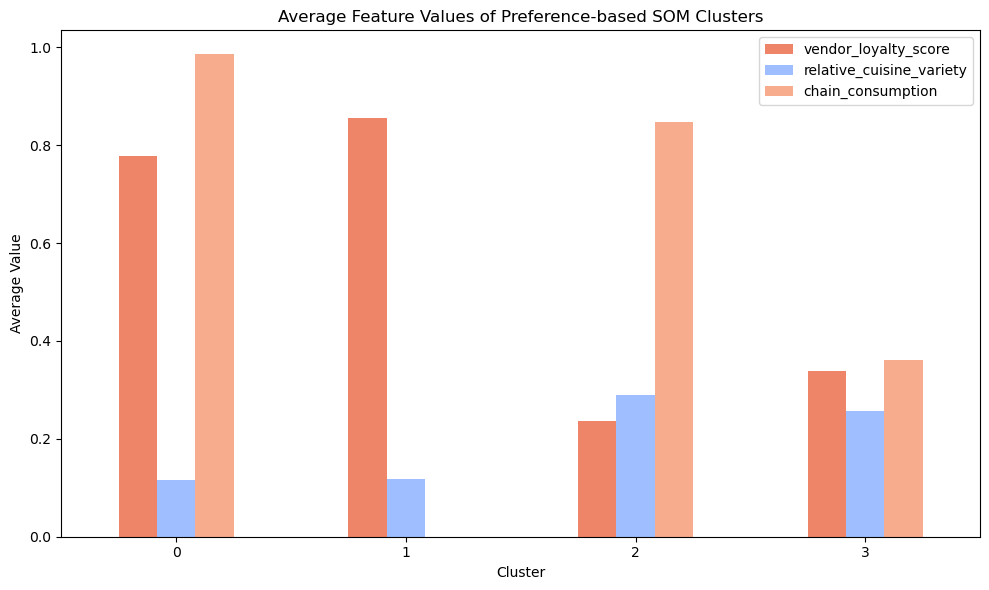

In [359]:
# plot the average feature values of the clusters
features = ['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']

# once more, group the features by cluster and compute the average values
cluster_means = preferences[features + ['prf_som_cluster']].groupby('prf_som_cluster').mean()

# use specific colors from coolwarm colormap to color the bars in the plot
cmap = cm.coolwarm
vendor_loyalty_score_color = cmap(0.8)
relative_cuisine_variety_color = cmap(0.3)
chain_consumption_color = cmap(0.7)

colors = [vendor_loyalty_score_color, relative_cuisine_variety_color, chain_consumption_color]

# plot the bar chart
ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Feature Values of Preference-based SOM Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Analysing the appropriateness of our solution using R²

In [360]:
# evaluate the clustering solution appropriateness using the R-squared metric
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(preferences)  # get total sum of squares
ssw_labels = preferences[preferences_columns + ['prf_som_cluster']].groupby('prf_som_cluster').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
round(r2, 3)

0.964

### Cluster visualization using U-Map

In [381]:
# comparing the performance of different distance metrics, using their resulting silhouette score and Davies-Bouldin index
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'minkowski', 'hamming']

# list to store the results
results = []

# itereate over each distance metric
for metric in distance_metrics:
    # apply UMAP for dimensionality reduction
    reducer = umap.UMAP(n_neighbors=5, n_components=2, metric=metric)
    embedding = reducer.fit_transform(preferences[preferences_columns])

    # cluster the data using KMeans
    kmeans = KMeans(n_clusters=5, random_state=42).fit(embedding)
    cluster_labels = kmeans.labels_

    # evaluate the clustering quality
    silhouette = silhouette_score(embedding, cluster_labels)
    db_index = davies_bouldin_score(embedding, cluster_labels)

    results.append((metric, silhouette, db_index, silhouette + db_index))

# create a dataframe that contains the results
results_df = pd.DataFrame(results, columns=['Metric', 'Silhouette Score', 'Davies-Bouldin Index', 'Combined Score'])

# find the metric with the best (lowest) combined score
best_metric = results_df.loc[results_df['Combined Score'].idxmin(), 'Metric']

print("Best Metric:", best_metric)

Best Metric: cosine


In [382]:
# apply UMAP for clustering visualization, using best performing distance metric
reducer = umap.UMAP(n_neighbors=5, n_components=2, metric='cosine') # n_neighbors was chosen by experimenting and comparing silhouette scores and Davies-Bouldin indexes
embedding = reducer.fit_transform(preferences[preferences_columns], y=preferences['prf_som_cluster']) 
embedding

array([[ 6.6304355, -4.9411283],
       [ 1.7214637,  2.2849195],
       [11.139182 , -5.543957 ],
       ...,
       [15.013937 , -4.901856 ],
       [ 9.510984 , -4.445147 ],
       [ 6.6162276, -8.338108 ]], dtype=float32)

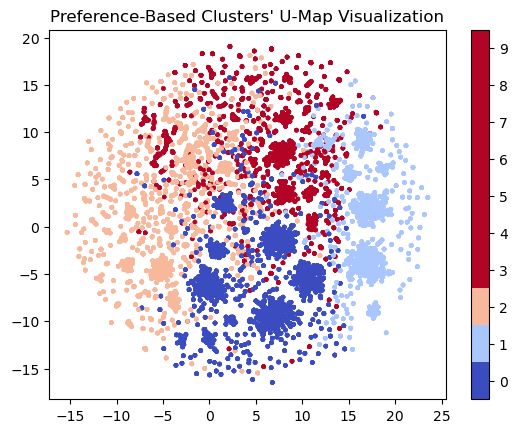

In [383]:
# plot the clusters
plt.scatter(embedding[:, 0], embedding[:, 1], c= preferences['prf_som_cluster'], cmap='coolwarm', s=5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("Preference-Based Clusters' U-Map Visualization")
plt.show()

In [384]:
# evaluate the clustering solution
silhouette_avg = silhouette_score(embedding, preferences['prf_som_cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

db_index = davies_bouldin_score(embedding, preferences['prf_som_cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

Silhouette Score: 0.23
Davies-Bouldin Index: 1.11


### Cluster visualization using t-SNE

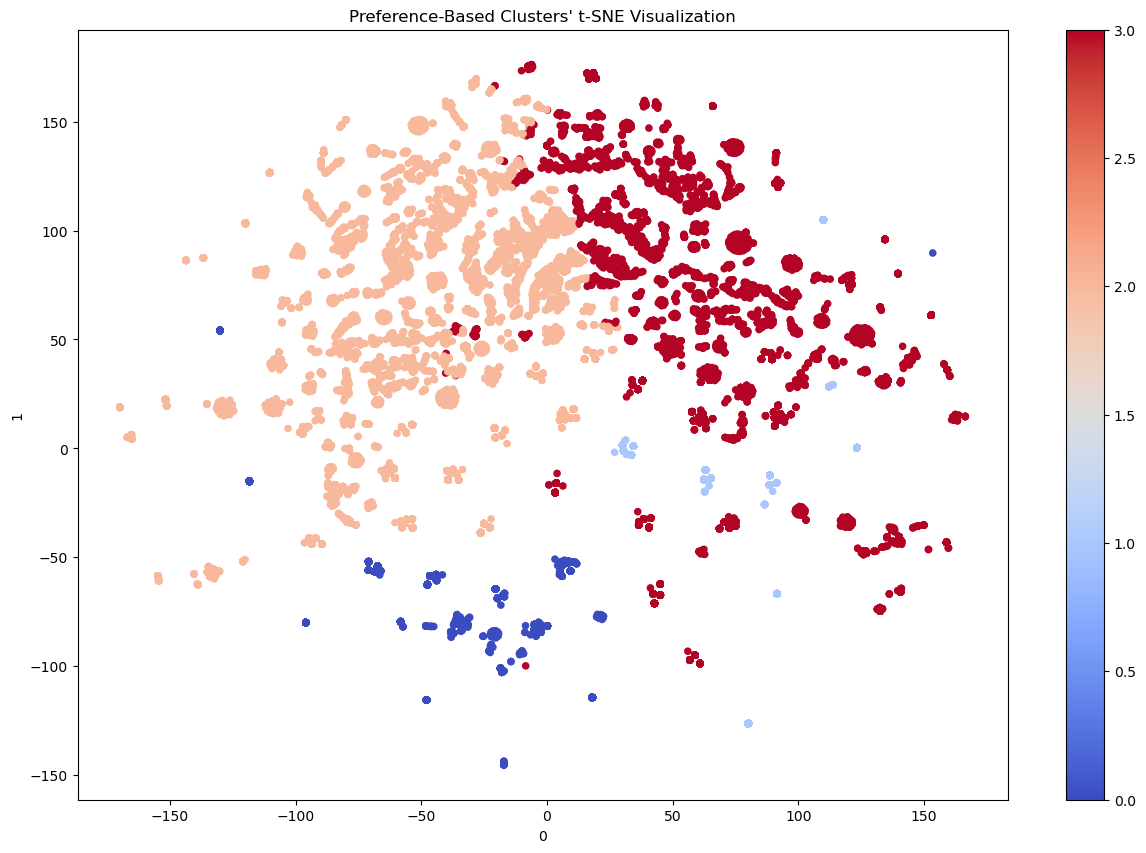

In [284]:
# apply t-SNE
two_dim = TSNE(random_state=42).fit_transform(preferences[preferences_columns])

# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=preferences['prf_som_cluster'], colormap='coolwarm', figsize=(15,10))
plt.title("Preference-Based Clusters' t-SNE Visualization")
plt.show()

### Behavioral Perspective

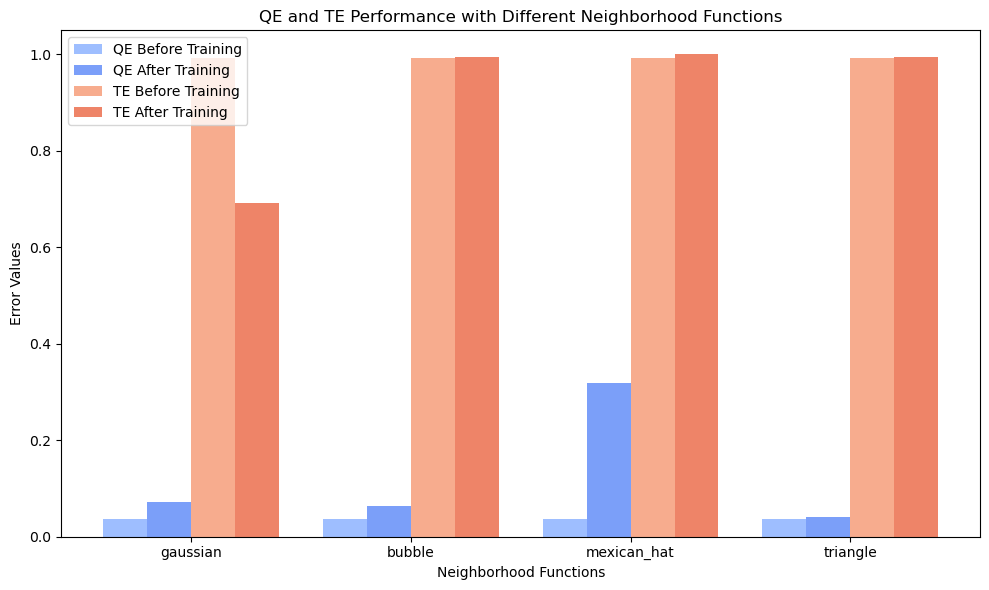

In [285]:
# comparing the performance of different neighborhood functions
som_data = behaviours.values

sigma = 1
learning_rate = 0.9 
M = 30
N = 30  
n_feats = len(behaviours.columns)

neighborhood_functions = ['gaussian', 'bubble', 'mexican_hat', 'triangle']

qe_values = []
te_values = []

for func in neighborhood_functions:
    sm = MiniSom(M, N, n_feats,
                 sigma=sigma, 
                 neighborhood_function=func, 
                 learning_rate=learning_rate, 
                 topology='hexagonal', 
                 random_seed=42)
    
    sm.random_weights_init(som_data)
    
    qe_before = sm.quantization_error(som_data)
    te_before = sm.topographic_error(som_data)
    
    sm.train_batch(behaviours.values,
                   num_iteration=50000)
    
    qe_after = sm.quantization_error(som_data)
    te_after = sm.topographic_error(som_data)
    
    qe_values.append((qe_before, qe_after))
    te_values.append((te_before, te_after))

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.2
x_pos = np.arange(len(neighborhood_functions))

cmap = cm.coolwarm
qe_before_color = cmap(0.3)
qe_after_color = cmap(0.2)
te_before_color = cmap(0.7)
te_after_color = cmap(0.8)   

ax.bar(x_pos - width, [qe[0] for qe in qe_values], width, label="QE Before Training", color=qe_before_color)
ax.bar(x_pos, [qe[1] for qe in qe_values], width, label="QE After Training", color=qe_after_color)

ax.bar(x_pos + width, [te[0] for te in te_values], width, label="TE Before Training", color=te_before_color)
ax.bar(x_pos + 2*width, [te[1] for te in te_values], width, label="TE After Training", color=te_after_color)

ax.set_xlabel('Neighborhood Functions')
ax.set_ylabel('Error Values')
ax.set_title('QE and TE Performance with Different Neighborhood Functions')
ax.set_xticks(x_pos + width / 2)
ax.set_xticklabels(neighborhood_functions)
ax.legend()

plt.tight_layout()
plt.show()

In [413]:
# actual training of the SOM and exact error values

sigma = 1
learning_rate = 0.3 # the learning rate value was chosen by experimenting and comparing QE and TE values
num_iteration = 5
M = 30
N = 30

sm = MiniSom(
   M, N, len(behaviours.columns),
   sigma=sigma,
   learning_rate=learning_rate,
   neighborhood_function='gaussian', # according to the previous plot, the gaussian function performed better
   topology = 'rectangular', # both hexagonal and rectangular topologies were tested, rectangular performed better
   random_seed=42)

sm.random_weights_init(behaviours.values)
initial_qe = sm.quantization_error(behaviours.values)
initial_te = sm.topographic_error(behaviours.values)

sm.train(behaviours.values,
           use_epochs=True,
           random_order=True,
           num_iteration=num_iteration)

final_qe = sm.quantization_error(behaviours.values)
final_te = sm.topographic_error(behaviours.values)

print(f'Intital quantization error vs After training {np.round([initial_qe, final_qe], 4)}')
print(f'Intital topographic error vs After training {np.round([initial_te, final_te], 4)}')

Intital quantization error vs After training [0.0371 0.0305]
Intital topographic error vs After training [0.9915 0.2771]


In [414]:
# storing the weights of the neurons after training
weights = sm.get_weights()
weights.shape

(30, 30, 6)

In [415]:
# adapting the function to plot rectangles instead of hexagons
# all remains unchanged, except for the shape of the patches
def plot_rectangles(som, sf, 
                    colornorm, 
                    matrix_vals, 
                    label="", 
                    cmap=cm.Greys, 
                    annot=False):     

    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):

            wx, wy = som.convert_map_to_euclidean((i,j)) 

            # only change, from RegularPolygon to Rectangle
            rect = Rectangle((wx - 0.5, wy - 0.5), 1, 1,  # width and height of the rectangle are 1
                             facecolor=cmap(colornorm(matrix_vals[i, j])), 
                             alpha=1, 
                             edgecolor='white',
                             linewidth=.5)
            axs.add_patch(rect)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx, wy, annot_val, 
                         ha='center', va='center', 
                         fontsize='small')

    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    sf.add_axes(ax_cb)

    return sf

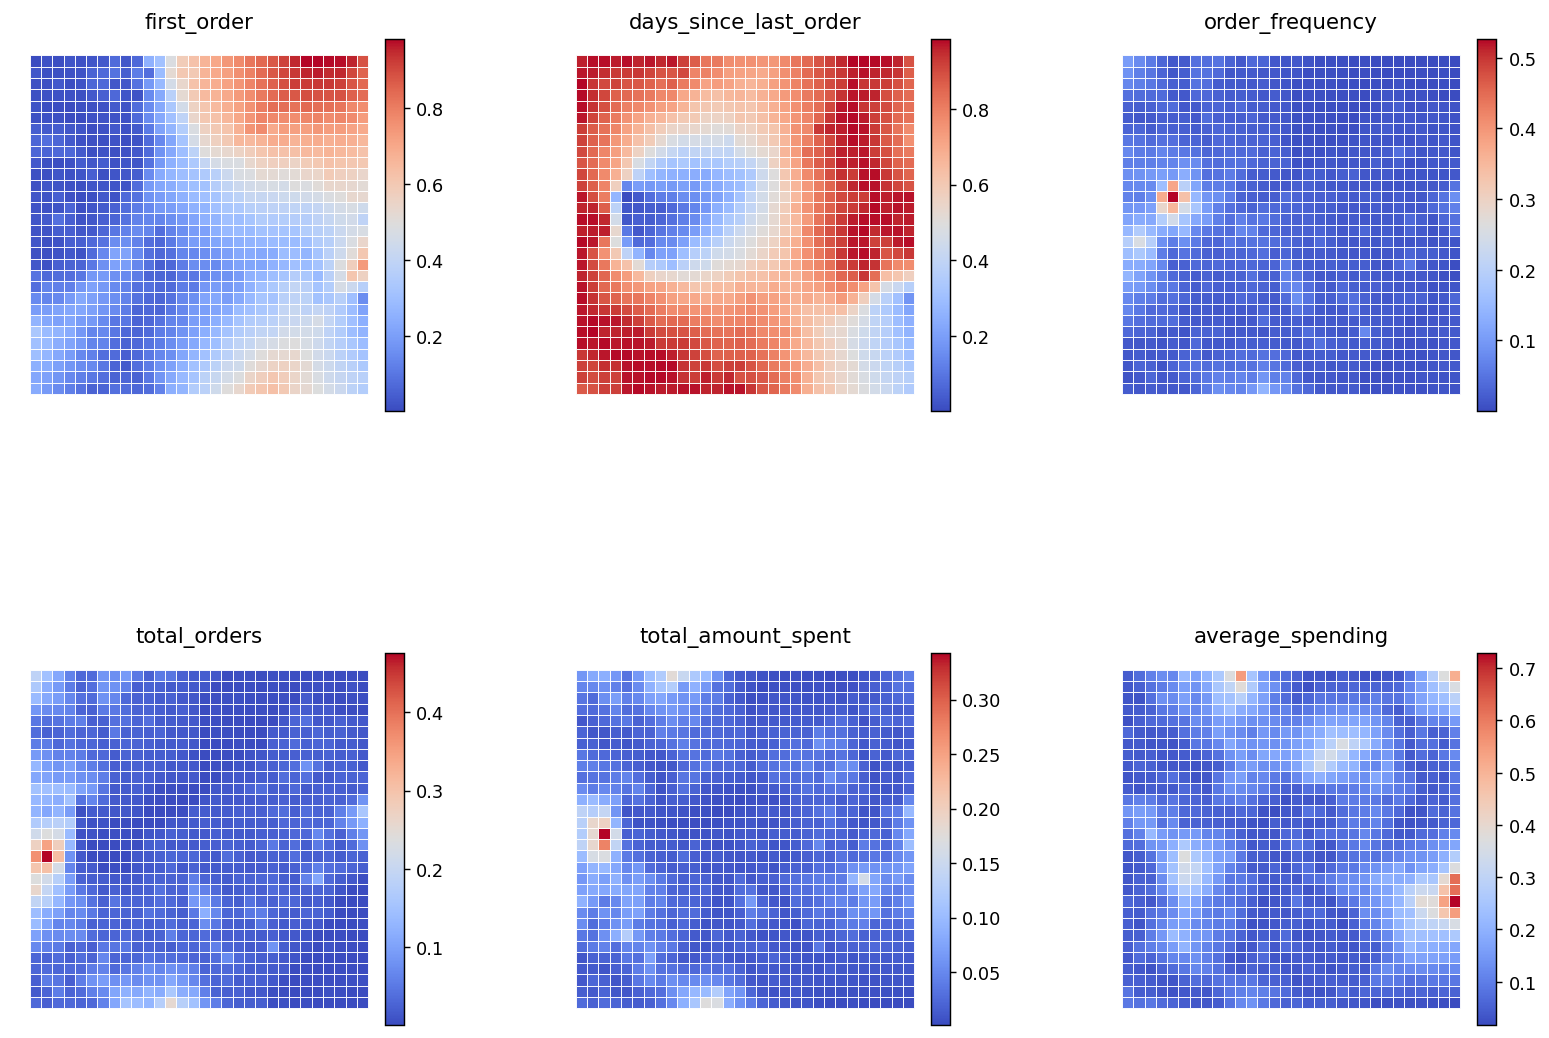

In [416]:
# plot the hexagons for each feature in the perspective
figsize=(12, 8)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128)

subfigs = fig.subfigures(2, 3, wspace=0.2, hspace=0.4) 

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(behaviours.columns)), subfigs.flatten()):
    
    matrix_vals = weights[:, :, cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))

    sf = plot_rectangles(
        sm, sf, 
        colornorm,
        matrix_vals,
        label=behaviours.columns[cpi],
        cmap=cm.coolwarm)

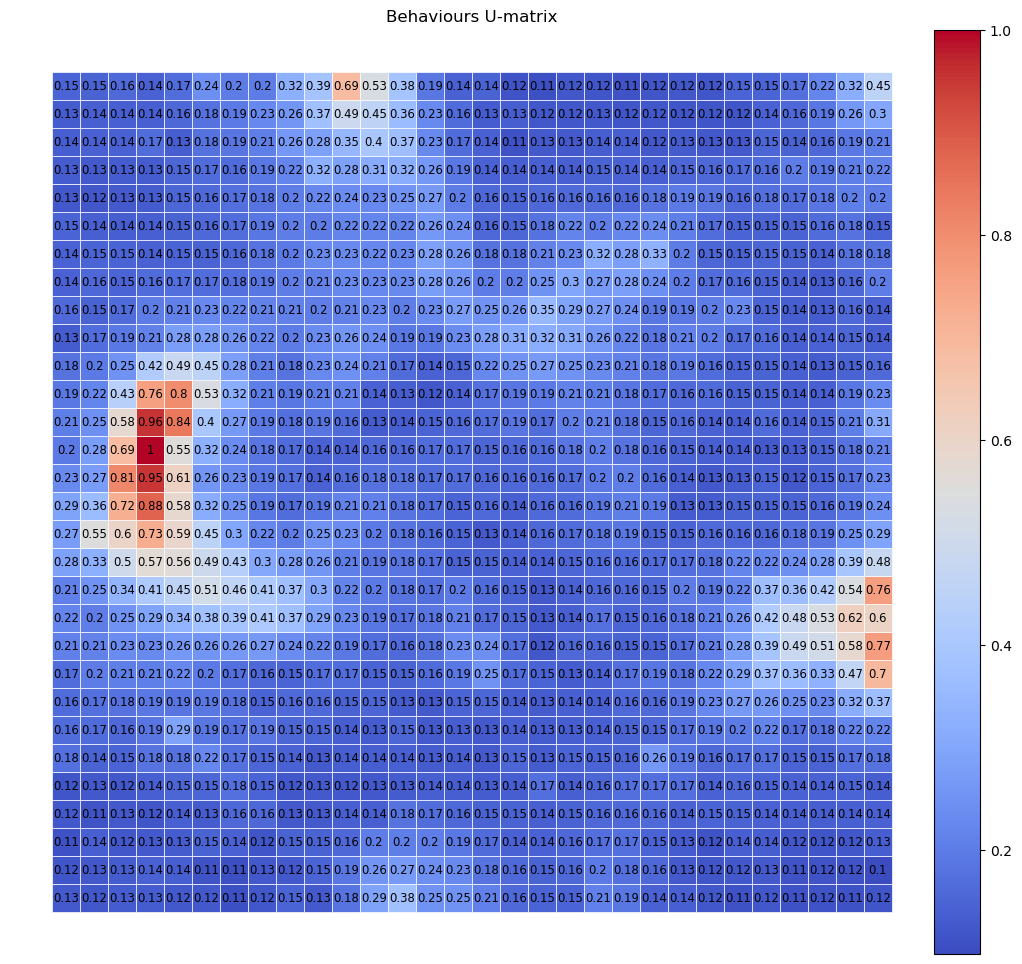

In [417]:
# plot the U-matrix for the SOM 
umatrix = sm.distance_map(scaling='mean')
fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))

fig = plot_rectangles(sm, fig, 
                    colornorm,
                    umatrix,
                    label="Behaviours U-matrix",
                    cmap=cm.coolwarm,
                    annot=True)

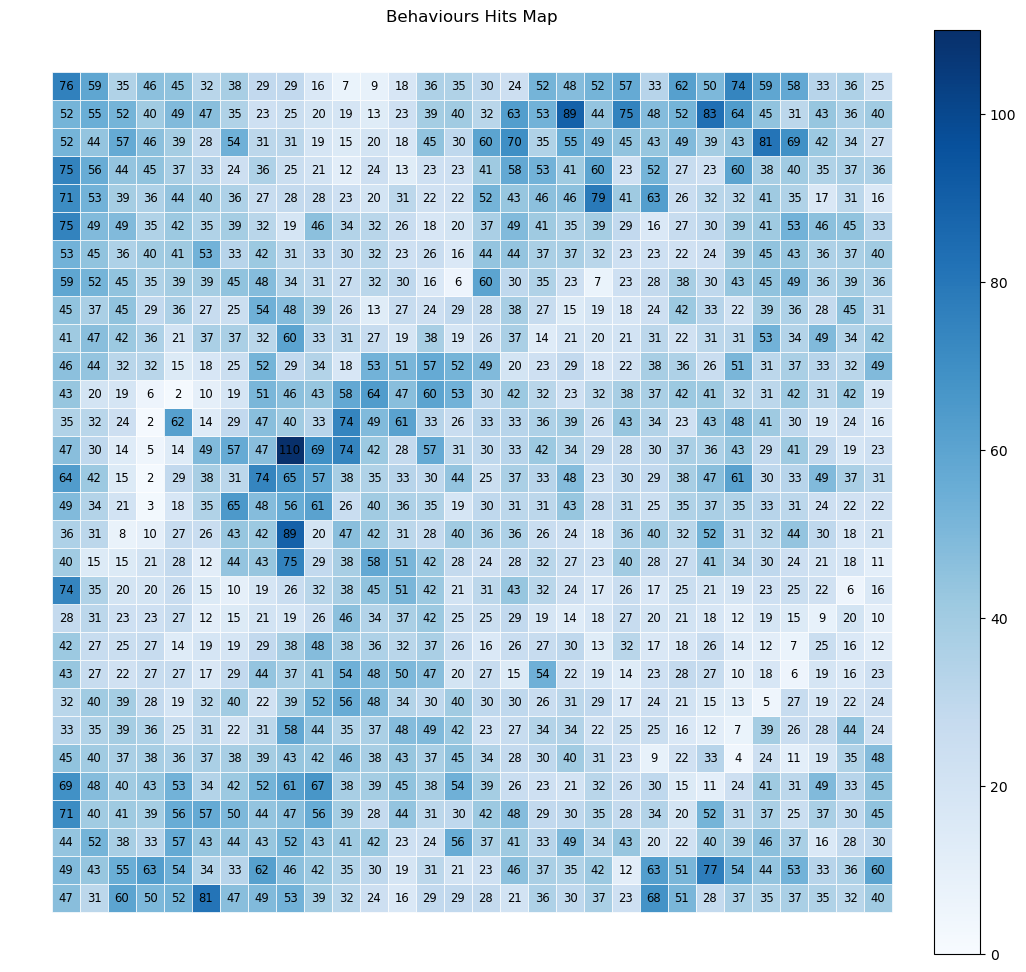

In [418]:
# plot the hits map for the SOM
hitsmatrix = sm.activation_response(behaviours.values)

fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))

fig = plot_rectangles(sm, fig, 
                    colornorm,
                    hitsmatrix,
                    label="Behaviours Hits Map",
                    cmap=cm.Blues,
                    annot=True)

### K-Means implementation

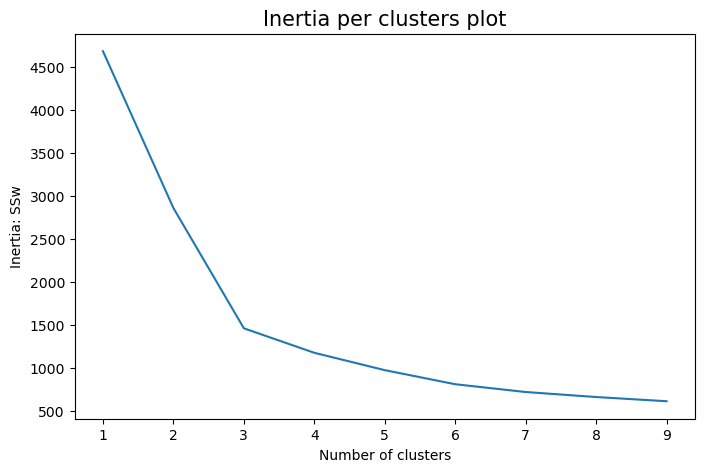

In [419]:
# deciding on the optimal number of clusters to use in the KMeans model

range_clusters = range(1, 10)

inertia = []

for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(behaviours)
    inertia.append(kmclust.inertia_)

# plot inertia
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia per clusters plot", size=15)

plt.show()

In [420]:
# flattened the weights of the neurons into a 2D list
behaviours_weights_flat = sm.get_weights().reshape((M*N),len(behaviours.columns))
behaviours_weights_flat.shape

(900, 6)

In [421]:
# perform K-Means clustering on top of the SOM weights
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
kmeans_behaviors_labels = kmeans.fit_predict(behaviours_weights_flat)

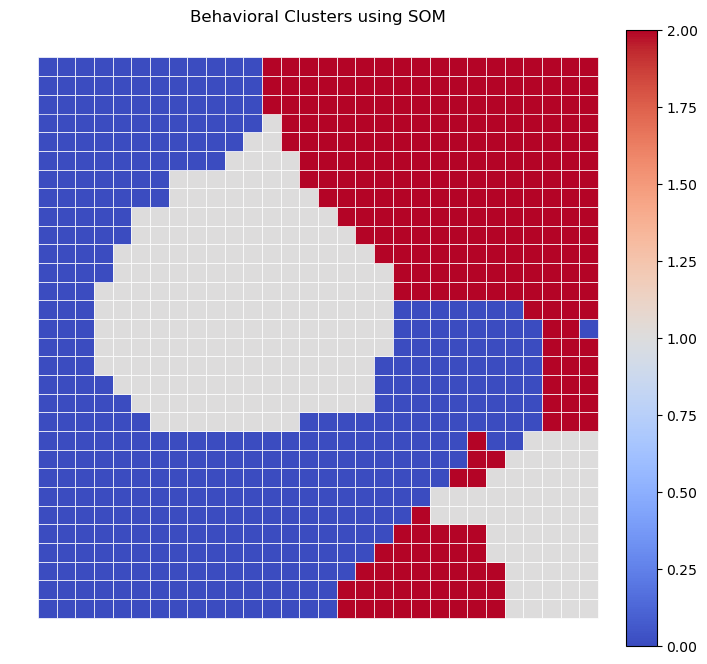

In [422]:
# plot the clusters on the SOM
kmeans_matrix = kmeans_behaviors_labels.reshape((M,N))

fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(kmeans_matrix))

fig = plot_rectangles(sm, fig, 
                    colornorm,
                    kmeans_matrix,
                    label="Behavioral Clusters using SOM",
                    cmap=cm.coolwarm)

In [423]:
# evaluate the clustering quality using silhouette score and Davies-Bouldin index

som_behaviors_score = silhouette_score(behaviours_weights_flat, kmeans_behaviors_labels, metric='euclidean')
print(f'Silhouette Score: {round(som_behaviors_score,3)}') 

som_behaviors_index = davies_bouldin_score(behaviours_weights_flat, kmeans_behaviors_labels)
print(f'Davies-Bouldin Index: {round(som_behaviors_index,3)}') 

Silhouette Score: 0.416
Davies-Bouldin Index: 0.843


In [424]:
# check the nodes and respective clusters
behaviour_nodes = behaviours_weights_flat

df_behaviors_nodes = pd.DataFrame(behaviour_nodes, columns=behaviours.columns)
df_behaviors_nodes['som_cluster'] = kmeans_behaviors_labels
df_behaviors_nodes

first_order  days_since_last_order  order_frequency  total_orders  \
0       0.235447               0.872674         0.019014      0.030636   
1       0.223135               0.916718         0.009584      0.016016   
2       0.252952               0.915947         0.012874      0.021814   
3       0.301591               0.930058         0.016175      0.028230   
4       0.302908               0.975056         0.015220      0.028293   
..           ...                    ...              ...           ...   
895     0.767084               0.829382         0.009606      0.013492   
896     0.836994               0.836567         0.001425      0.000558   
897     0.845115               0.851009         0.002262      0.002167   
898     0.853968               0.862540         0.001765      0.001492   
899     0.883976               0.886210         0.001580      0.001426   

     total_amount_spent  average_spending  som_cluster  
0              0.026085          0.089516            0  
1              0.015830          0.084164            0  
2              0.011484          0.050317            0  
3              0.012489          0.045277            0  
4              0.010321          0.037869            0  
..                  ...               ...          ...  
895            0.024565          0.151801            2  
896            0.017969          0.235166            2  
897            0.025524          0.289845            2  
898            0.030363          0.363018            2  
899            0.042453          0.509287            2  

[900 rows x 7 columns]

In [425]:
# get BMU coordinates for each data point
bmu_index = np.array([sm.winner(x) for x in behaviours.values])

print(bmu_index.shape)

bmu_index

(31525, 2)


array([[ 4, 17],
       [ 4, 17],
       [ 4, 17],
       ...,
       [26, 29],
       [26, 29],
       [24, 29]], dtype=int64)

In [426]:
# get the final labels for each data point
som_final_behaviour_labels = [kmeans_matrix[i[0]][i[1]] for i in bmu_index]

In [427]:
# add the final labels to the main dataframe
df['beh_som_cluster'] = som_final_behaviour_labels

df.head()

CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e       0.000000   0.000000            0.0       0.0   
5d272b9dcb       0.045751   0.007126            0.0       0.0   
f6d1b2ba63       0.032833   0.000000            0.0       0.0   
180c632ed8       0.000000   0.015278            0.0       0.0   
4eb37a6705       0.051997   0.045578            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0           0.0          0.0   
5d272b9dcb                  0.0          0.0           0.0          0.0   
f6d1b2ba63                  0.0          0.0           0.0          0.0   
180c632ed8                  0.0          0.0           0.0          0.0   
4eb37a6705                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e     0.093442          0.0           0.0                0.0   
5d272b9dcb     0.000000          0.0           0.0                0.0   
f6d1b2ba63     0.000000          0.0           0.0                0.0   
180c632ed8     0.057786          0.0           0.0                0.0   
4eb37a6705     0.000000          0.0           0.0                0.0   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai   DOW_0     DOW_1  \
customer_id                                                                    
1b8f824d5e         0.0                       0.0       0.0  0.0625  0.000000   
5d272b9dcb         0.0                       0.0       0.0  0.0625  0.000000   
f6d1b2ba63         0.0                       0.0       0.0  0.0625  0.000000   
180c632ed8         0.0                       0.0       0.0  0.0000  0.058824   
4eb37a6705         0.0                       0.0       0.0  0.0000  0.058824   

             DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_10     HR_11  \
customer_id                                                                   
1b8f824d5e     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.000000   
5d272b9dcb     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.04  0.027778   
f6d1b2ba63     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.027778   
180c632ed8     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.027778   
4eb37a6705     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.000000   

             HR_12  HR_13     HR_14  HR_15  HR_16  HR_17     HR_18  HR_19  \
customer_id                                                                 
1b8f824d5e     0.0    0.0  0.000000    0.0    0.0    0.0  0.083333    0.0   
5d272b9dcb     0.0    0.0  0.000000    0.0    0.0    0.0  0.000000    0.0   
f6d1b2ba63     0.0    0.0  0.000000    0.0    0.0    0.0  0.000000    0.0   
180c632ed8     0.0    0.0  0.076923    0.0    0.0    0.0  0.000000    0.0   
4eb37a6705     0.0    0.0  0.000000    0.0    0.0    0.0  0.000000    0.0   

             HR_2  HR_20  HR_21  HR_22  HR_23  HR_3  HR_4  HR_5  HR_6  HR_7  \
customer_id                                                                   
1b8f824d5e    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
5d272b9dcb    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
f6d1b2ba63    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
180c632ed8    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
4eb37a6705    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   

                 HR_8      HR_9  average_spending  customer_age  \
customer_id                                                       
1b8f824d5e   0.000000  0.000000          0.135354      0.046154   
5d272b9dcb   0.000000  0.000000          0.088841      0.030769   
f6d1b2ba63   0.000000  0.043478          0

In [428]:
# characterize the final clusters
behaviour_columns = behaviours.columns.tolist()

behaviours['beh_som_cluster'] = som_final_behaviour_labels

behaviours[behaviour_columns + ['beh_som_cluster']].groupby('beh_som_cluster').mean()

first_order  days_since_last_order  order_frequency  \
beh_som_cluster                                                        
0                   0.146864               0.857766         0.038563   
1                   0.202784               0.341556         0.042834   
2                   0.666636               0.810065         0.010245   

                 total_orders  total_amount_spent  average_spending  
beh_som_cluster                                                      
0                    0.063711            0.039824          0.081530  
1                    0.012932            0.014837          0.103513  
2                    0.014332            0.017074          0.108973

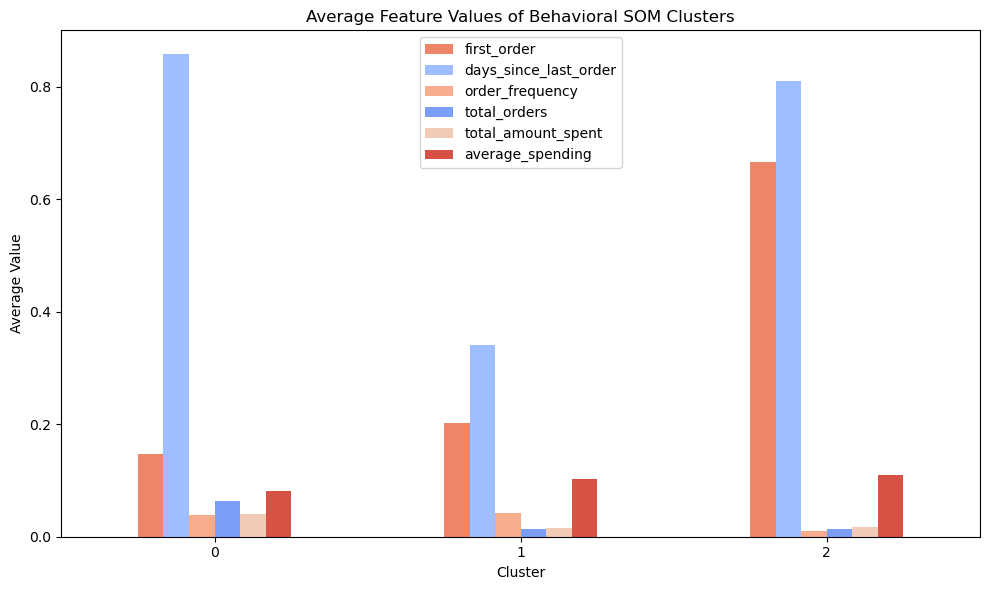

In [429]:
# plot the average feature values of the clusters
features = ['first_order','days_since_last_order', 'order_frequency', 'total_orders', 
            'total_amount_spent', 'average_spending']

cluster_means = behaviours[features + ['beh_som_cluster']].groupby('beh_som_cluster').mean()

cmap = cm.coolwarm
first_order_color = cmap(0.8)
days_since_last_order_color = cmap(0.3)
order_frequency_color = cmap(0.7)
total_orders_color = cmap(0.2)
total_amount_spent_color = cmap(0.6)
average_spending_color = cmap(0.9)

colors = [first_order_color, days_since_last_order_color, order_frequency_color,
          total_orders_color, total_amount_spent_color, average_spending_color]

ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Feature Values of Behavioral SOM Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

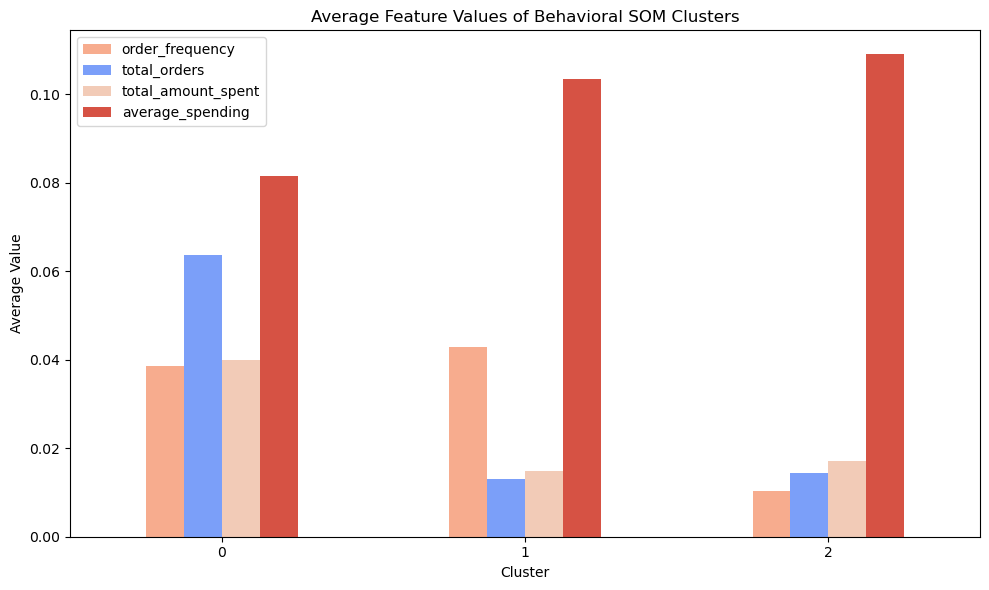

In [439]:
# plot the average feature values of the clusters
features = ['order_frequency', 'total_orders', 
            'total_amount_spent', 'average_spending']

cluster_means = behaviours[features + ['beh_som_cluster']].groupby('beh_som_cluster').mean()

cmap = cm.coolwarm
order_frequency_color = cmap(0.7)
total_orders_color = cmap(0.2)
total_amount_spent_color = cmap(0.6)
average_spending_color = cmap(0.9)

colors = [order_frequency_color, total_orders_color, total_amount_spent_color, average_spending_color]

ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Feature Values of Behavioral SOM Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Analysing the appropriateness of our solution using R²

In [430]:
# evaluate the clustering solution appropriateness using the R-squared metric
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss 

sst = get_ss(behaviours)
ssw_labels = behaviours[behaviour_columns + ['beh_som_cluster']].groupby('beh_som_cluster').apply(get_ss)
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
round(r2, 3)

0.946

### Cluster visualization using U-Map

In [432]:
# comparing the performance of different distance metrics, using their resulting silhouette score and Davies-Bouldin index
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'minkowski', 'hamming']

# list to store the results
results = []

# itereate over each distance metric
for metric in distance_metrics:
    # apply UMAP for dimensionality reduction
    reducer = umap.UMAP(n_neighbors=5, n_components=2, metric=metric)
    embedding = reducer.fit_transform(behaviours[behaviour_columns])

    # cluster the data using KMeans
    kmeans = KMeans(n_clusters=5, random_state=42).fit(embedding)
    cluster_labels = kmeans.labels_

    # evaluate the clustering quality
    silhouette = silhouette_score(embedding, cluster_labels)
    db_index = davies_bouldin_score(embedding, cluster_labels)

    results.append((metric, silhouette, db_index, silhouette + db_index))

# create a dataframe that contains the results
results_df = pd.DataFrame(results, columns=['Metric', 'Silhouette Score', 'Davies-Bouldin Index', 'Combined Score'])

# find the metric with the best (lowest) combined score
best_metric = results_df.loc[results_df['Combined Score'].idxmin(), 'Metric']

print("Best Metric:", best_metric)

Best Metric: cosine


In [436]:
# apply UMAP for clustering visualization, using best performing distance metric
reducer = umap.UMAP(n_neighbors=10, n_components=2, metric='cosine') # n_neighbors was chosen by experimenting and comparing silhouette scores and Davies-Bouldin indexes
embedding = reducer.fit_transform(behaviours[behaviour_columns], y=behaviours['beh_som_cluster']) 
embedding

array([[14.160949  , 13.221933  ],
       [14.100102  , 13.192288  ],
       [14.010168  , 13.165337  ],
       ...,
       [ 5.4840827 , 19.356573  ],
       [ 5.3519335 , 20.855795  ],
       [ 3.1236541 , -0.91720426]], dtype=float32)

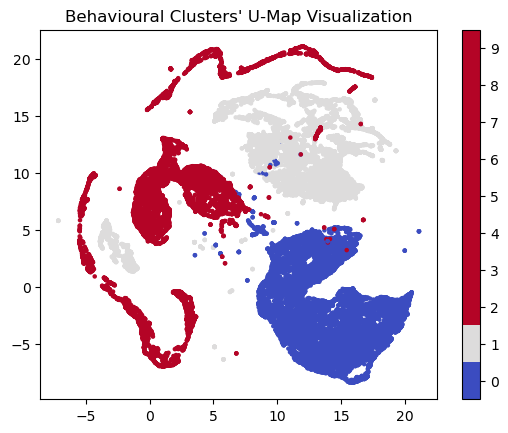

In [437]:
# plot the clusters
plt.scatter(embedding[:, 0], embedding[:, 1], c= behaviours['beh_som_cluster'], cmap='coolwarm', s=5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("Behavioural Clusters' U-Map Visualization")
plt.show()

In [438]:
# evaluate the clustering solution
silhouette_avg = silhouette_score(embedding, behaviours['beh_som_cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

db_index = davies_bouldin_score(embedding, behaviours['beh_som_cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

Silhouette Score: 0.42
Davies-Bouldin Index: 1.09


### Cluster visualization using t-SNE

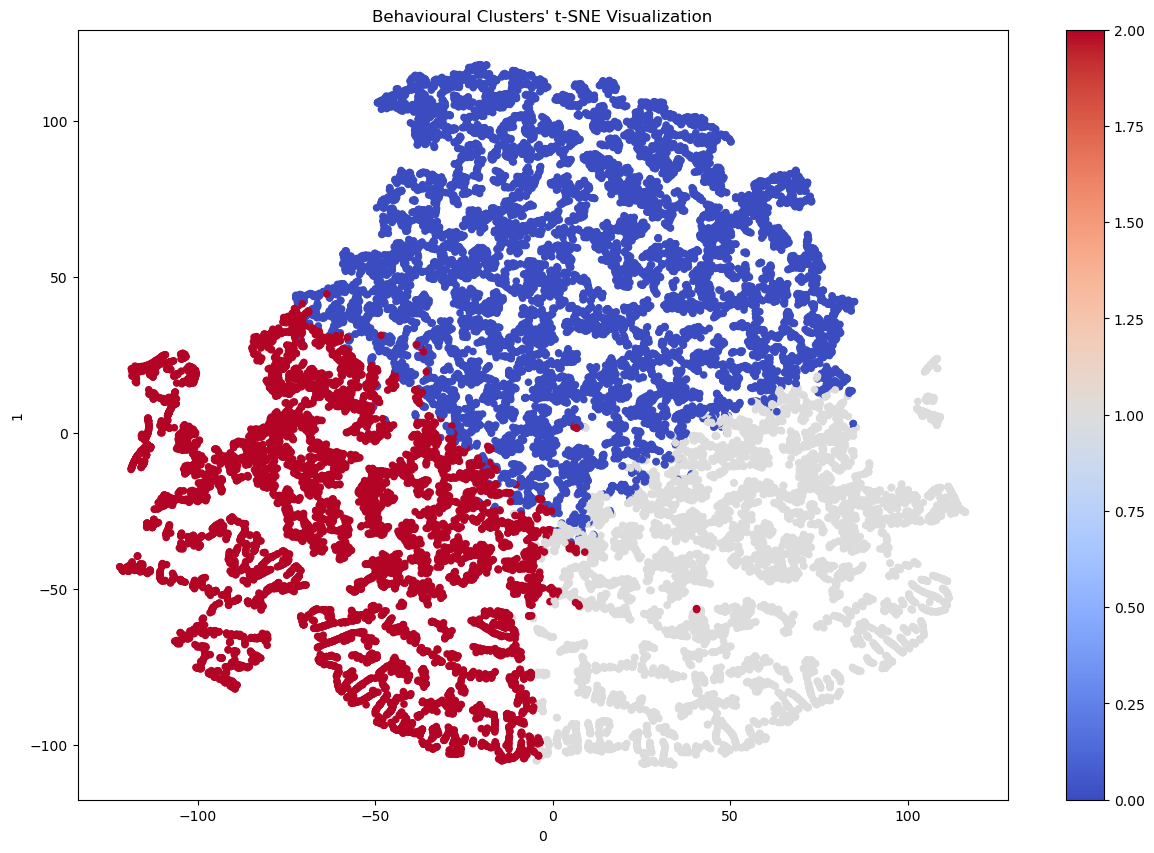

In [ ]:
# apply t-SNE
two_dim = TSNE(random_state=42).fit_transform(behaviours[behaviour_columns])

# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=behaviours['beh_som_cluster'], colormap='coolwarm', figsize=(15,10))
plt.title("Behavioural Clusters' t-SNE Visualization")
plt.show()